# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- **Nama:** Rizkyka Mediano Sandie
- **Email:** medianosandie@gmail.com
- **ID Dicoding:** mediano_sandie_OQpS

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv('/content/students_performance.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Data Understanding

In [4]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [5]:
df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
610,1,1,2,9853,1,1,112.0,1,37,37,191,182,106.1,1,0,1,1,0,1,20,0,0,7,7,7,13.857143,0,0,7,8,7,12.571429,0,8.9,1.4,3.51,Graduate
761,1,5,1,171,1,1,137.0,1,3,19,1,10,144.7,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,16.2,0.3,-0.92,Enrolled
1938,1,39,1,9085,1,1,150.0,1,19,19,4,10,100.0,0,0,0,1,0,0,24,0,1,6,11,5,13.000000,0,1,6,12,1,12.000000,0,13.9,-0.3,0.79,Dropout
763,1,15,1,9147,1,1,133.1,21,1,3,192,3,100.0,0,0,1,1,1,0,40,1,0,5,10,1,11.000000,0,0,5,10,1,10.000000,0,11.1,0.6,2.02,Enrolled
3789,1,17,1,9238,1,1,140.0,1,1,44,4,2,124.6,1,0,1,0,1,0,20,0,3,9,9,3,13.333333,0,2,6,6,2,12.500000,0,8.9,1.4,3.51,Dropout


In [6]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak ada cell yg bernilai null

In [7]:
df_prep = df.copy()

In [8]:
# converting numerical columns into categorical ones
cat_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]
for col in cat_cols:
    if col in df_prep.columns:
        df_prep[col] = df_prep[col].astype(str)

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [9]:
# merging Graduate and Enrolled category into new Not_Dropout category
df_prep['Status'] = df_prep['Status'].replace({'Graduate': 'Not_Dropout', 'Enrolled': 'Not_Dropout'})
df_prep['Status'].unique()

array(['Dropout', 'Not_Dropout'], dtype=object)

### EDA

1.   Bagaimanakah proporsi dropout dan tidak droput dari kelompok mahasiswa berdasarkan sebera lancar dalam membayar uang kuliah?
2.   Bagaimanakah hubungan performa di semester satu (number of courses approved) mempengaruhi apakah mahasiswa akan dropout atau tidak?
3.   Bagaimanakah kelompok usia mempengaruhi kemungkinan drop out?
4.  Bagaimanakah dampak dari penerimaan beasiswa terhadap kemungkinan drop out?


<ipython-input-10-9b97d4768a84>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


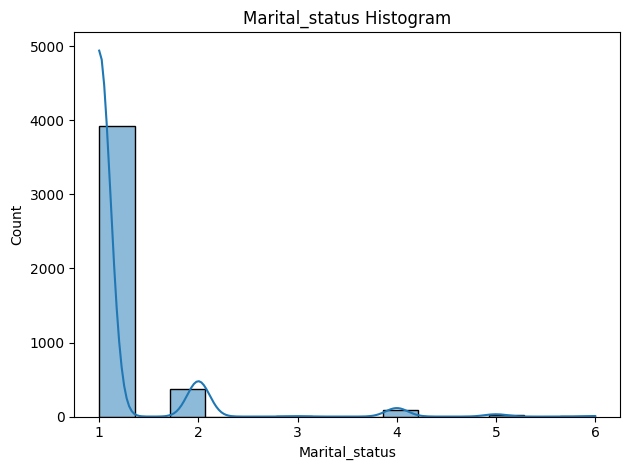

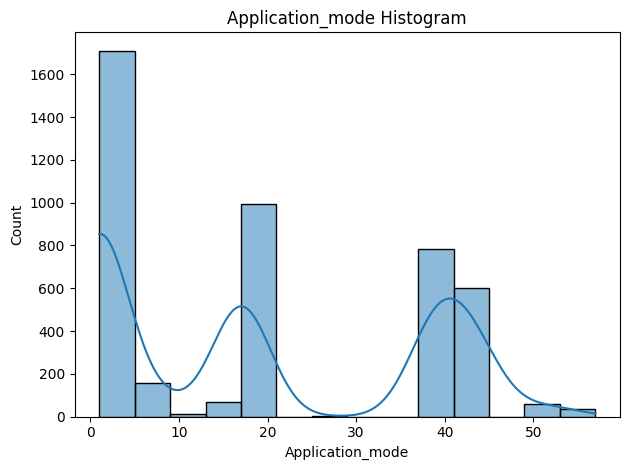

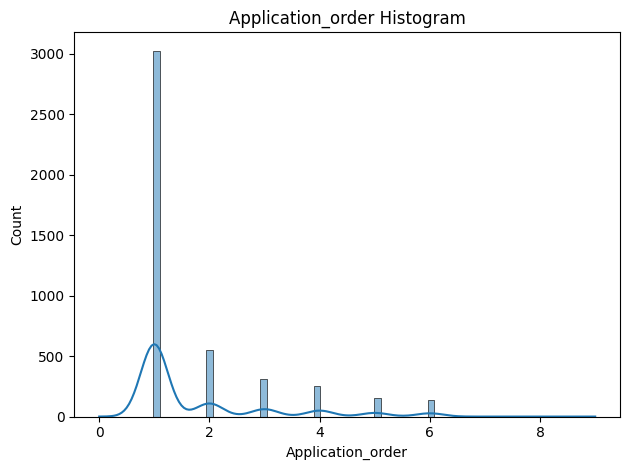

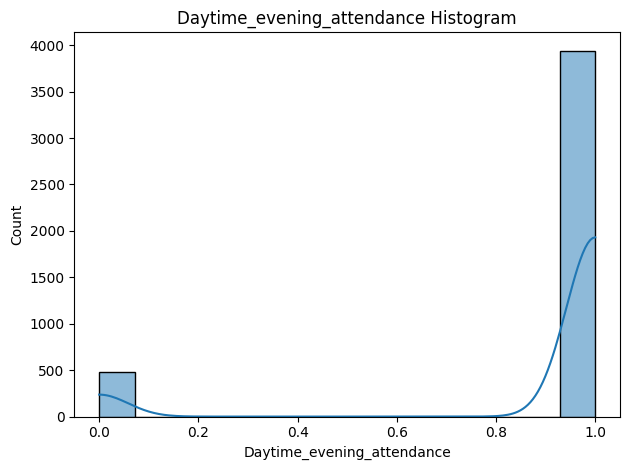

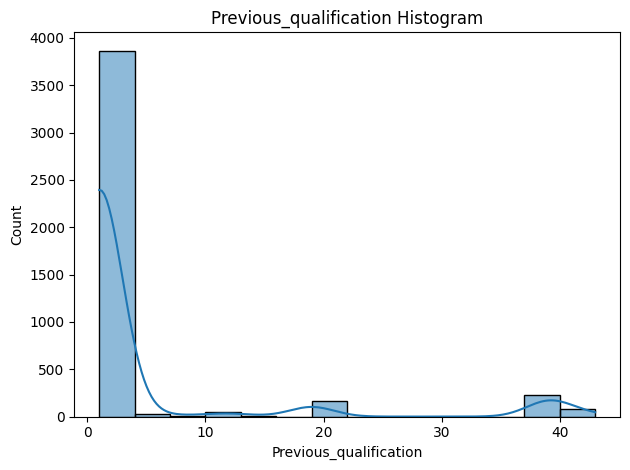

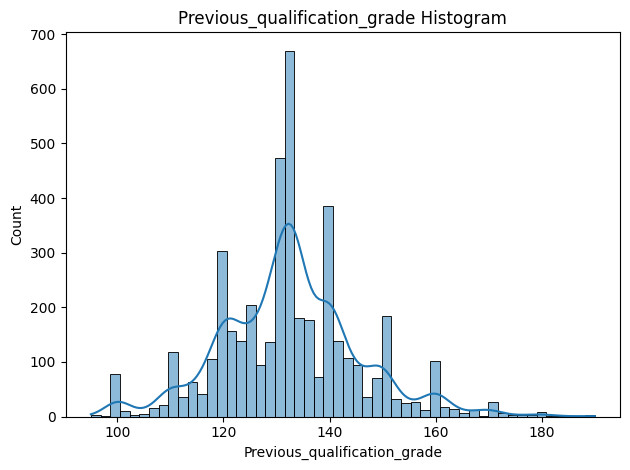

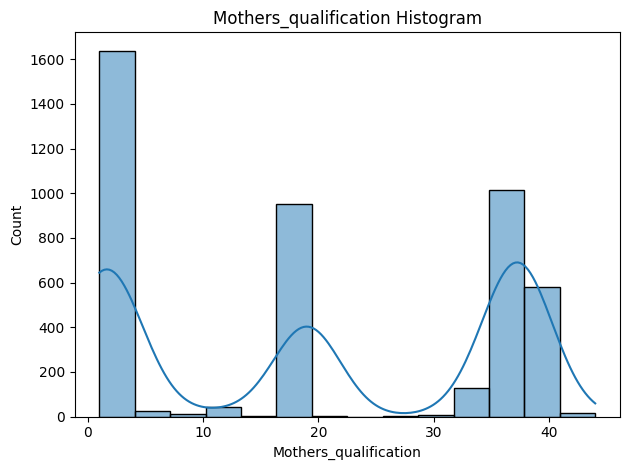

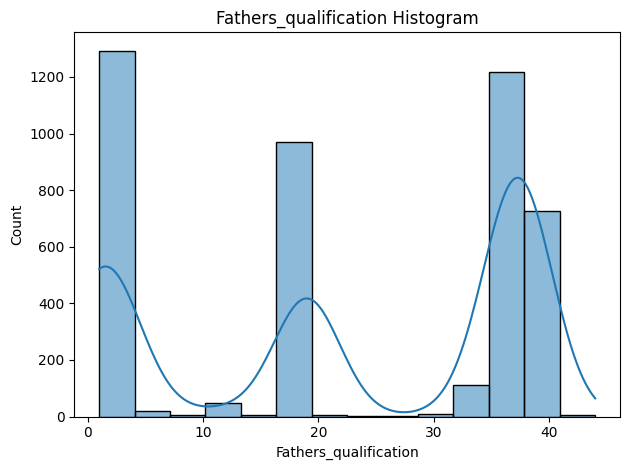

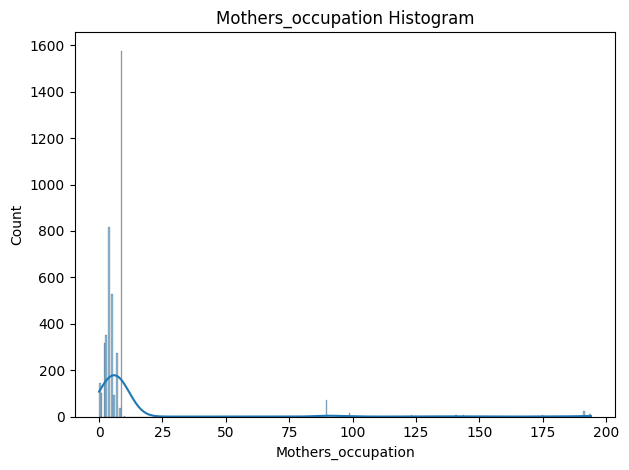

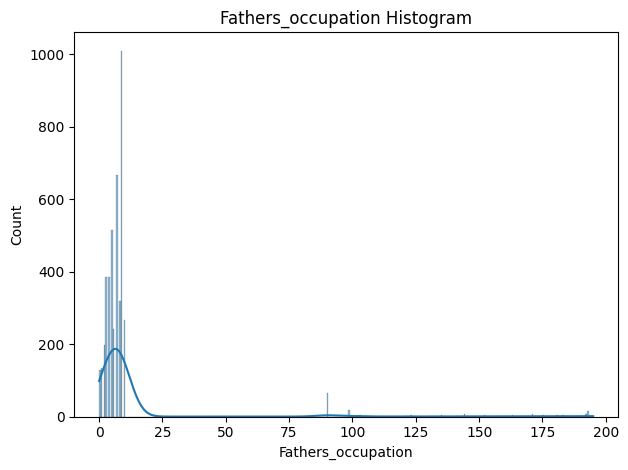

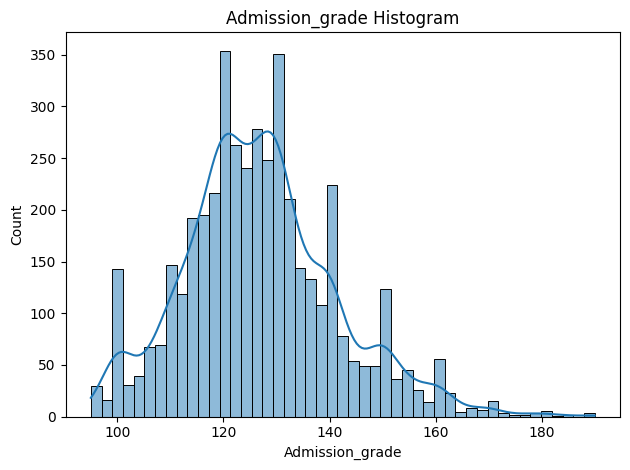

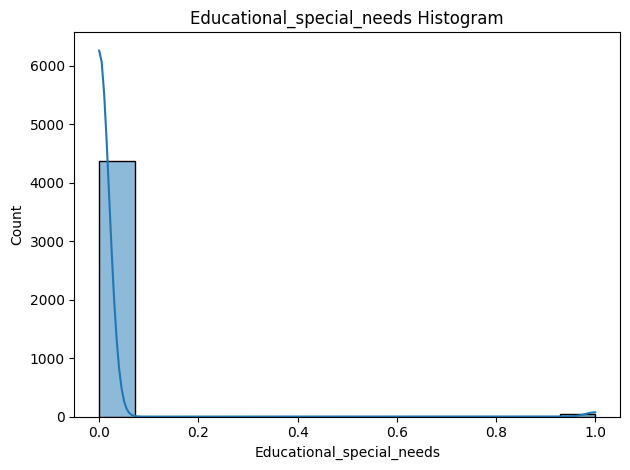

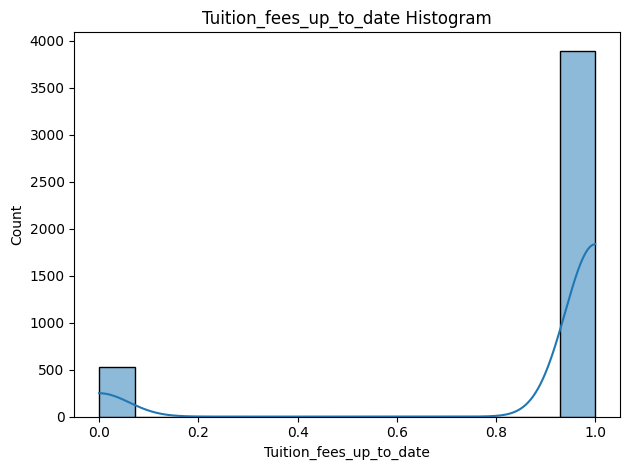

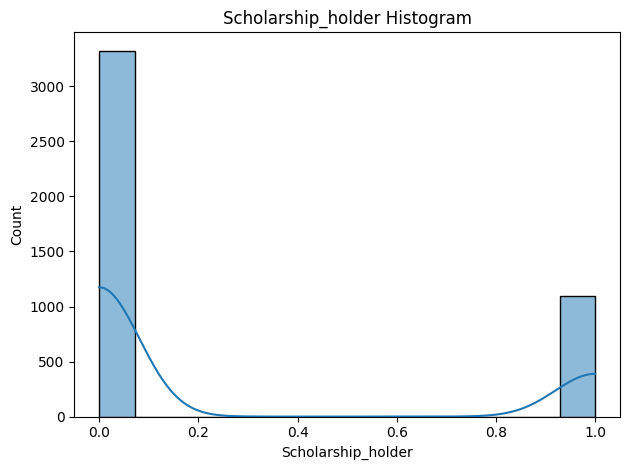

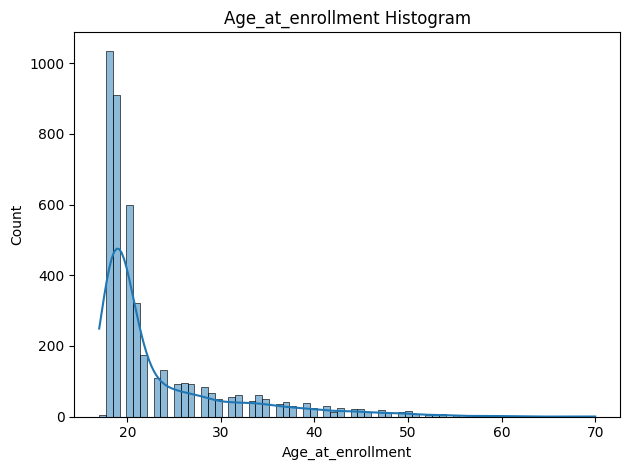

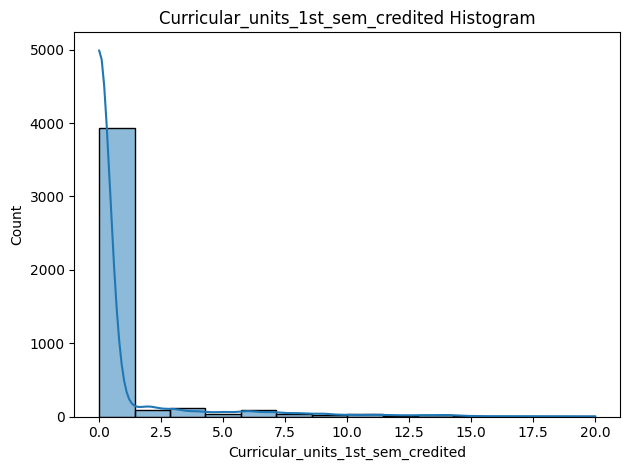

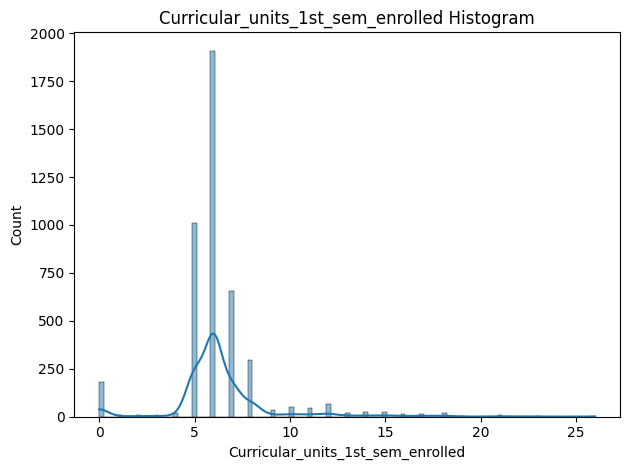

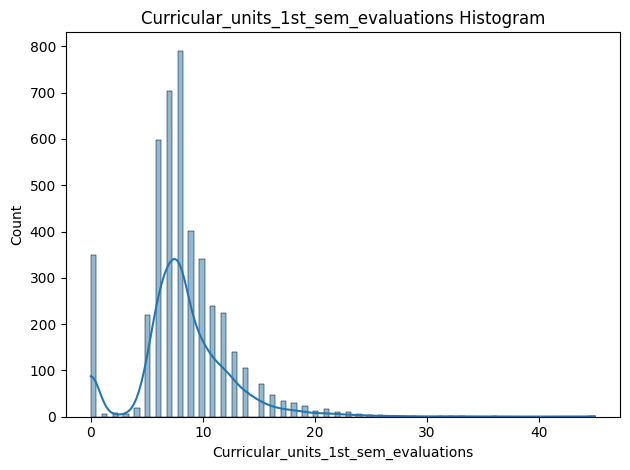

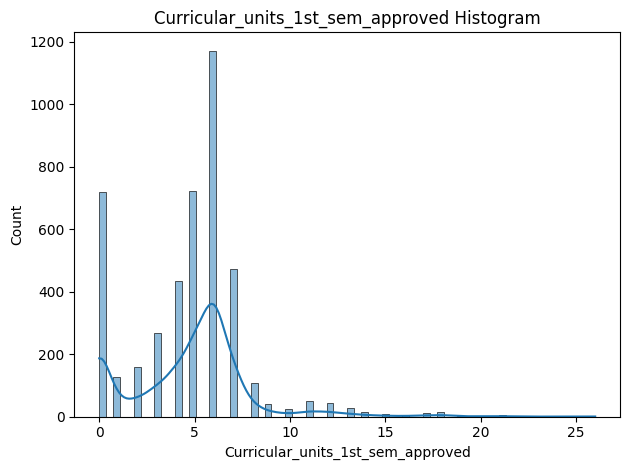

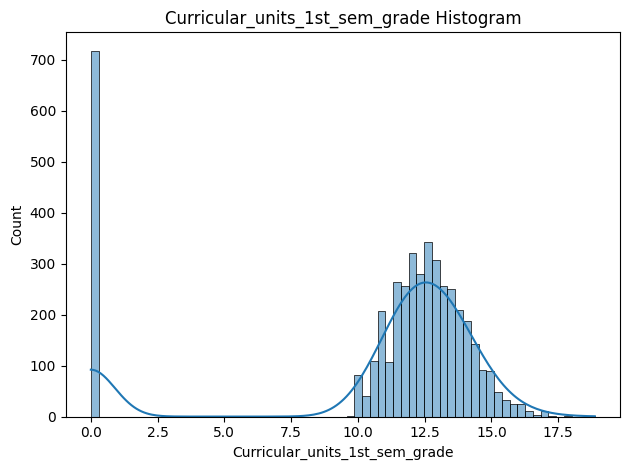

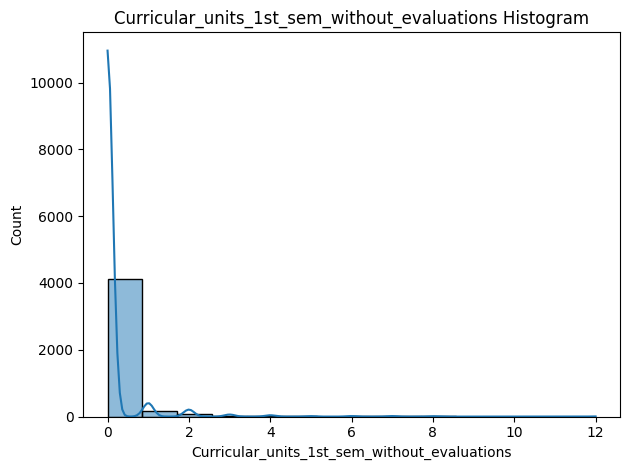

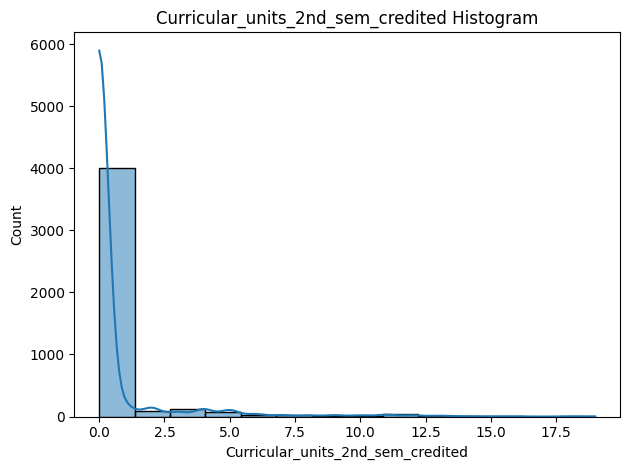

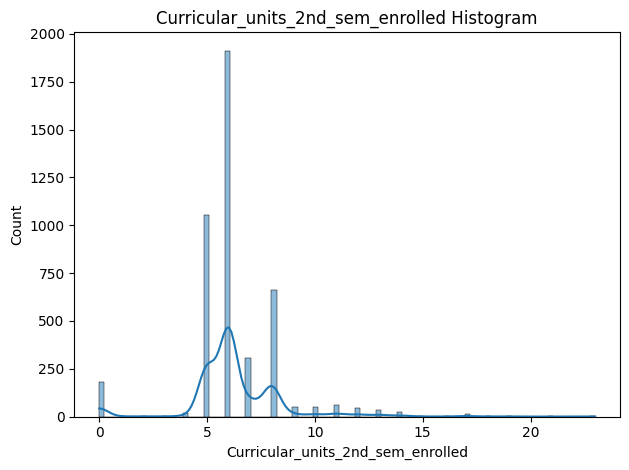

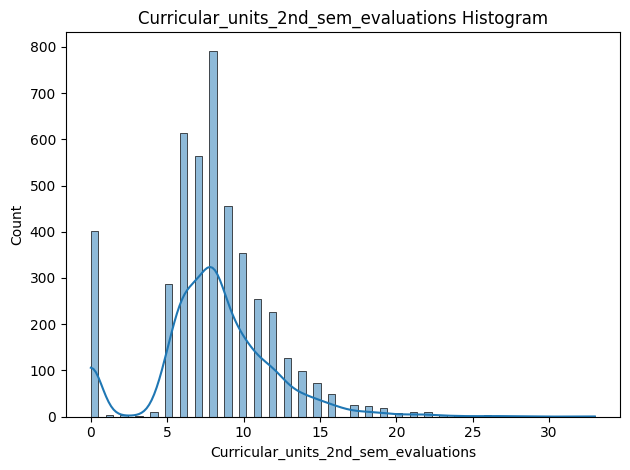

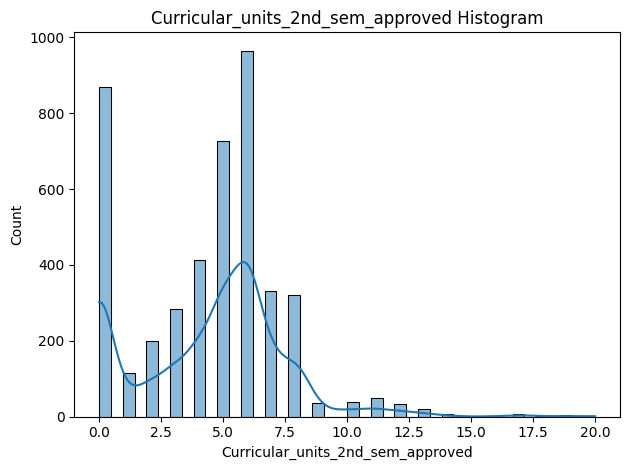

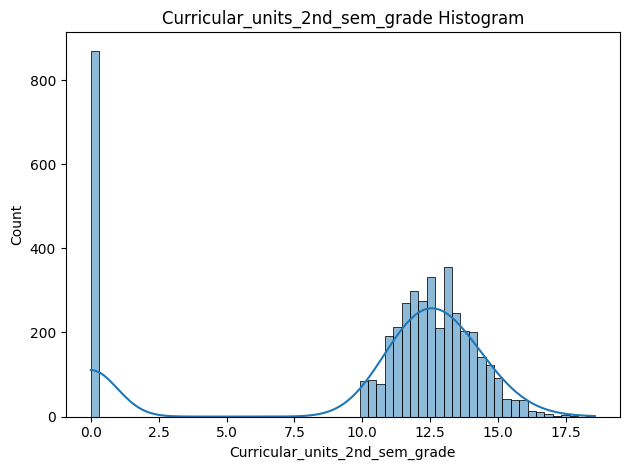

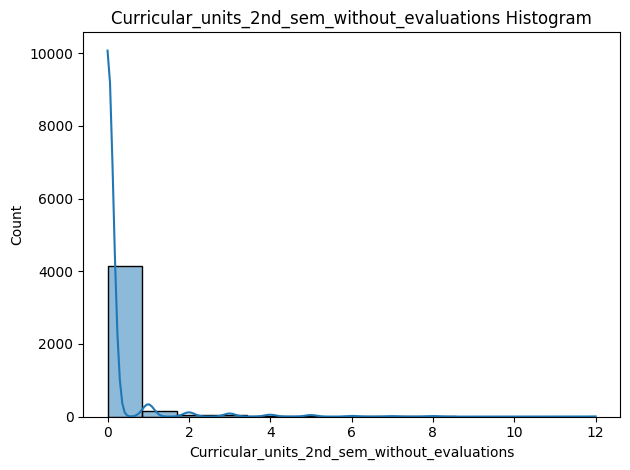

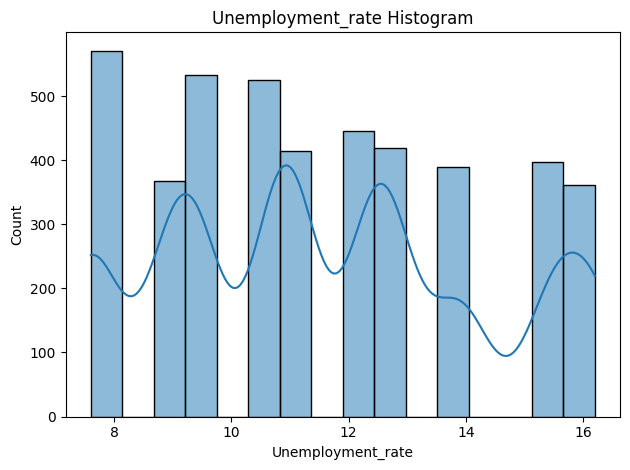

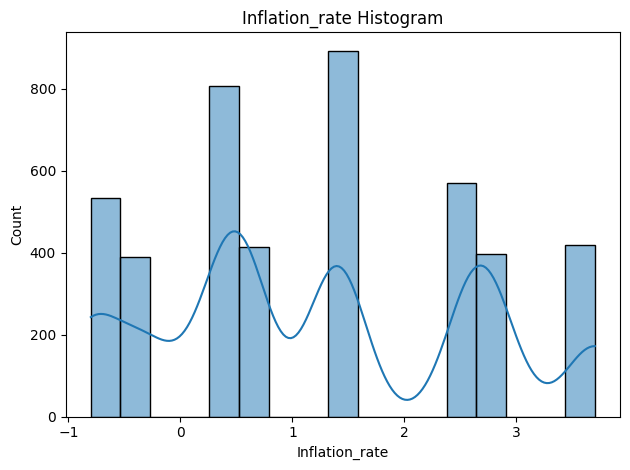

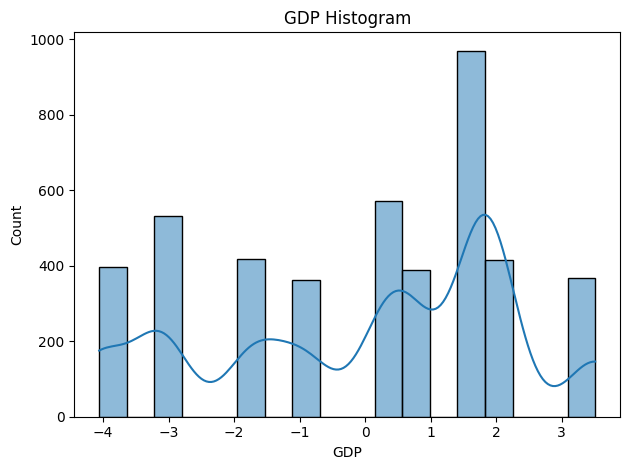

In [10]:
num_cols = df_prep.select_dtypes(include=['int64','float64'])
for col in num_cols:
    plt.figure()
    sns.histplot(df_prep[col], kde=True)
    plt.title(f'{col} Histogram')
    plt.tight_layout()

<ipython-input-11-83c660dceeae>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


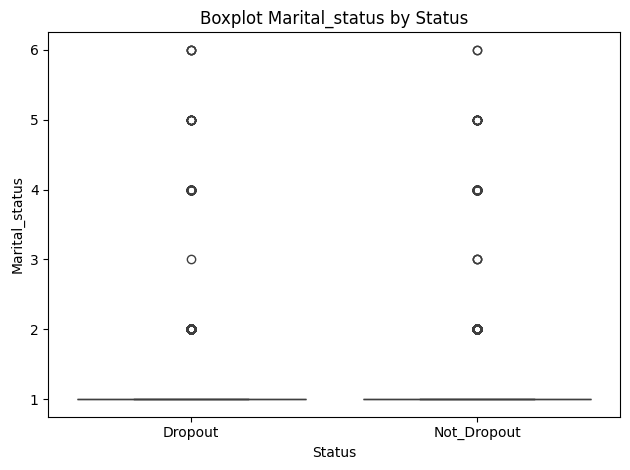

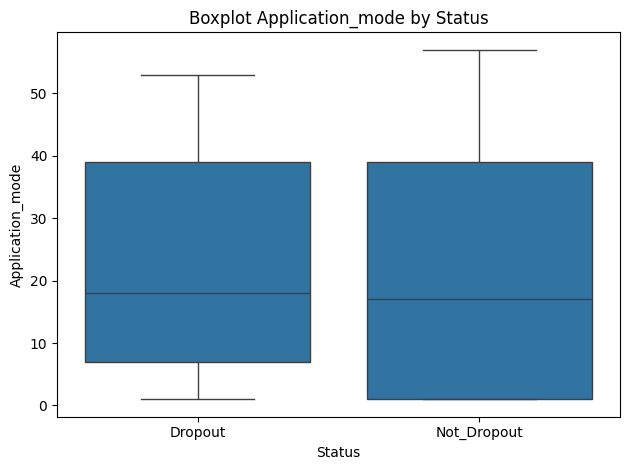

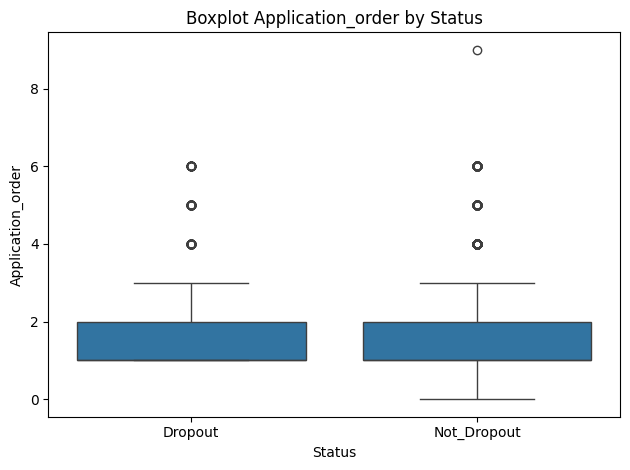

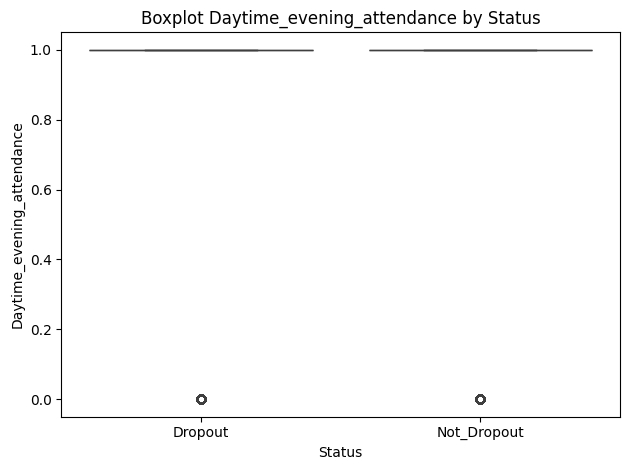

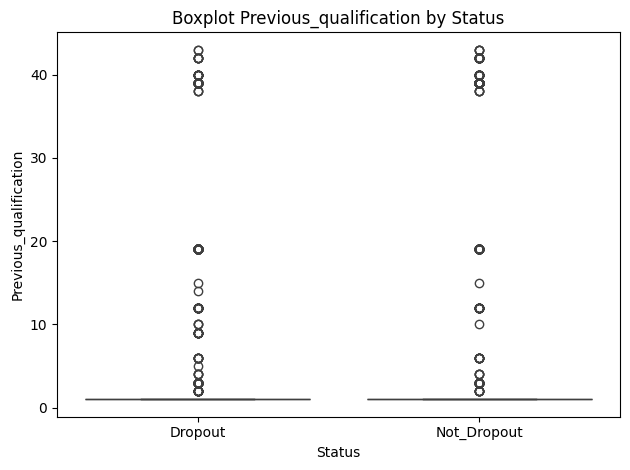

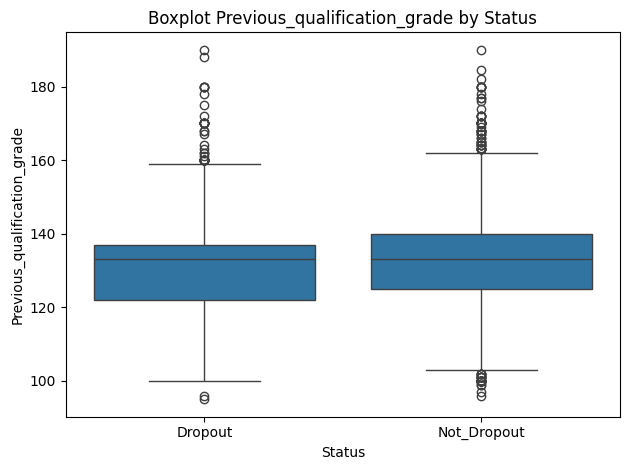

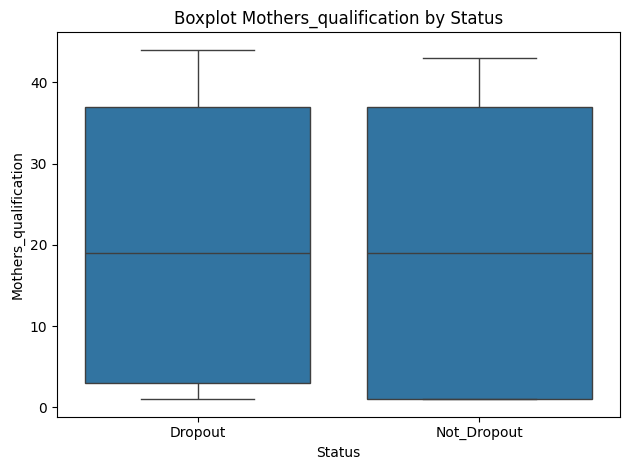

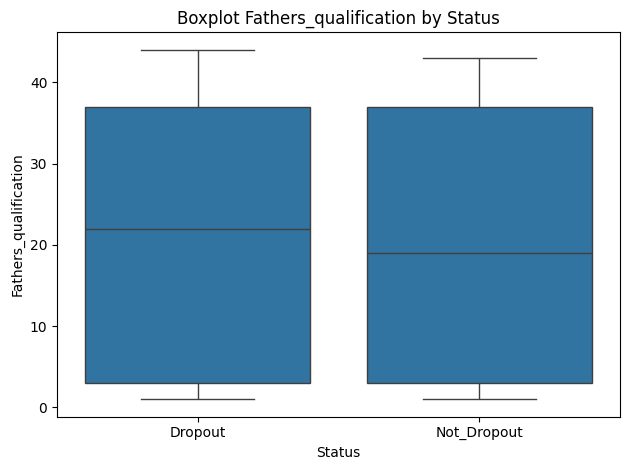

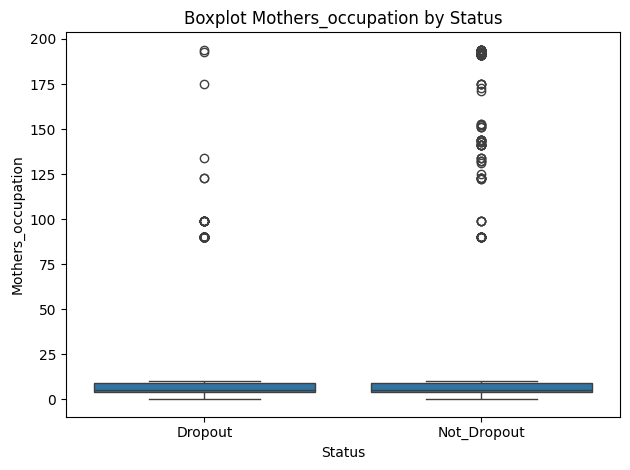

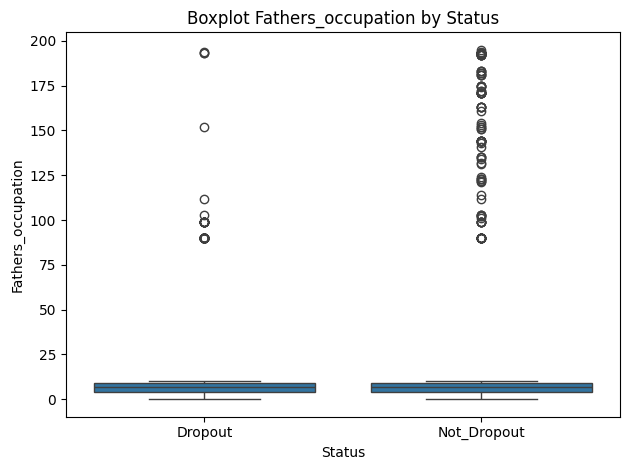

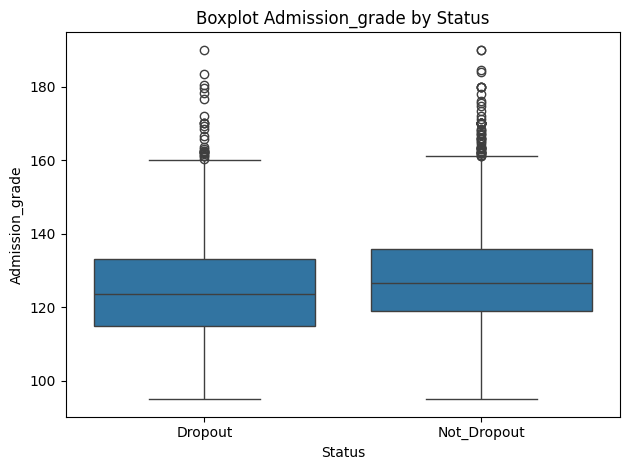

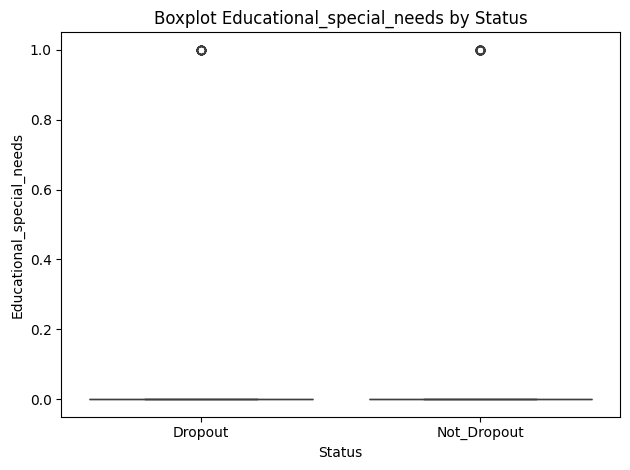

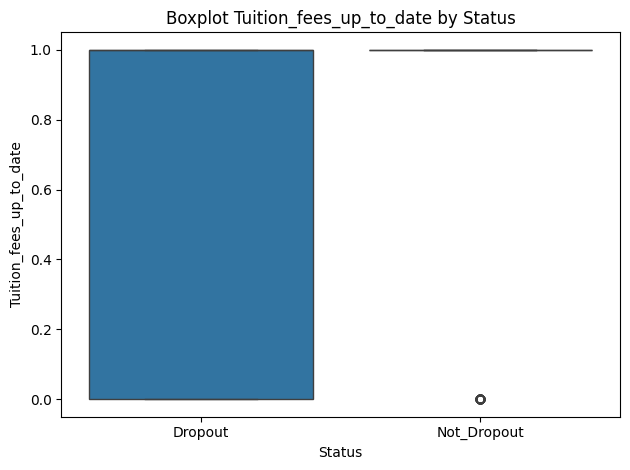

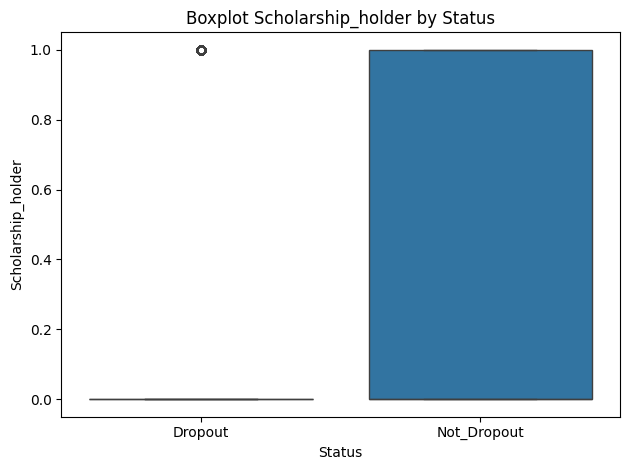

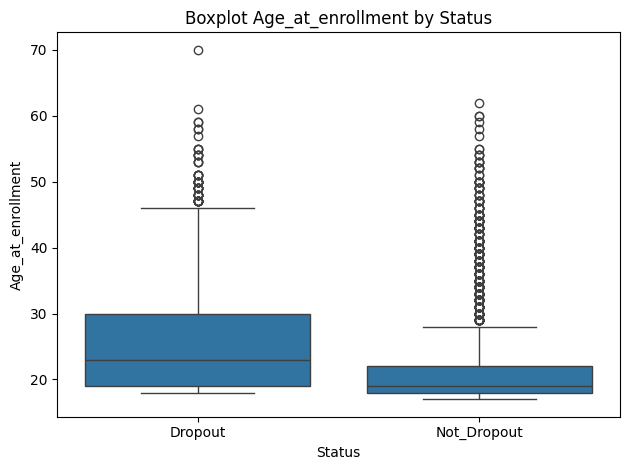

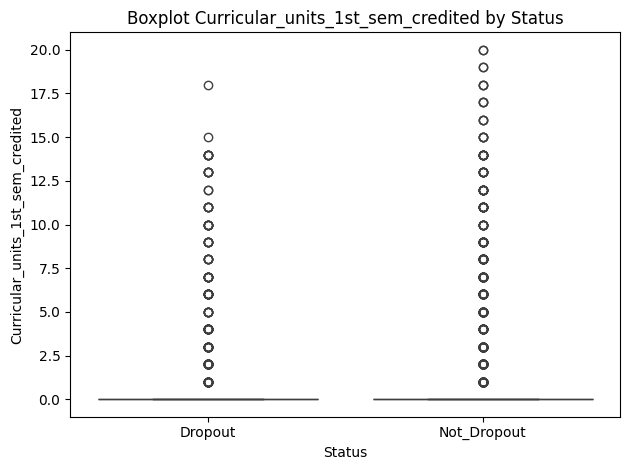

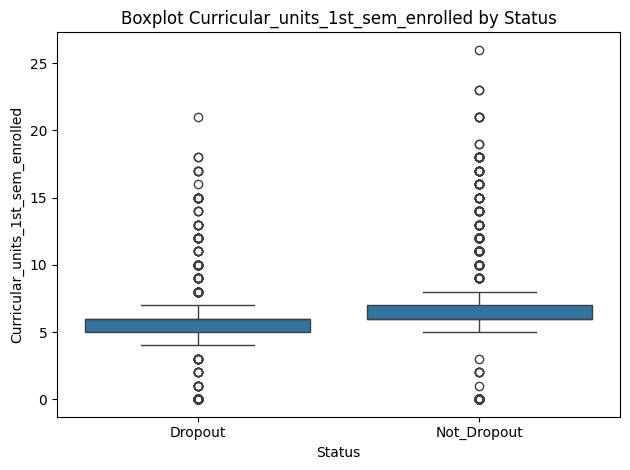

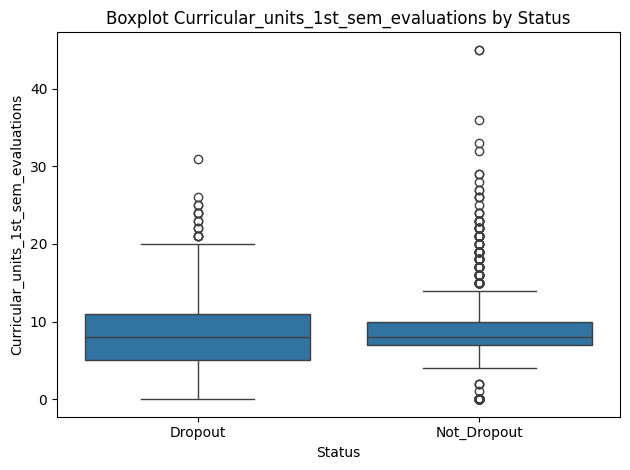

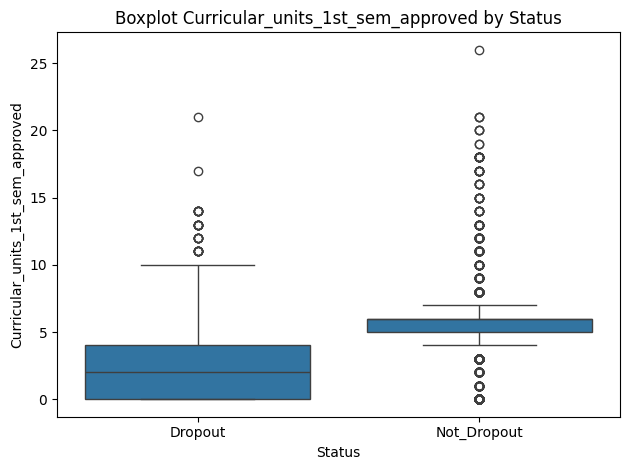

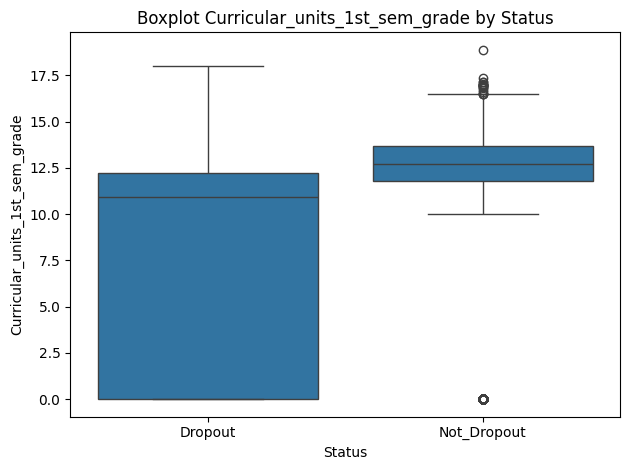

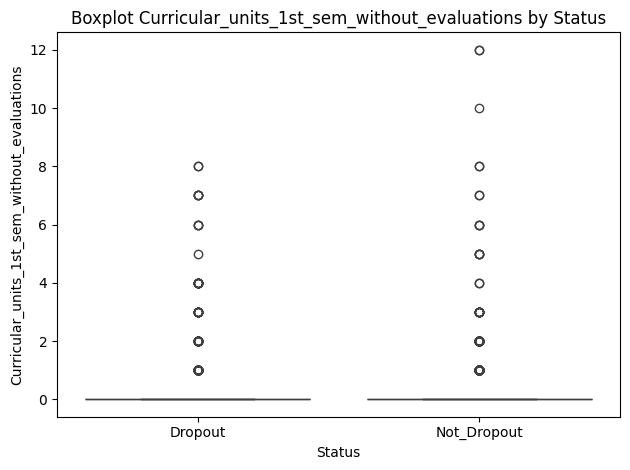

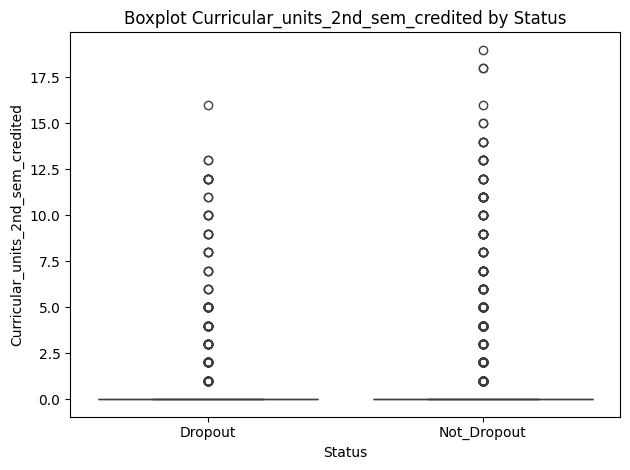

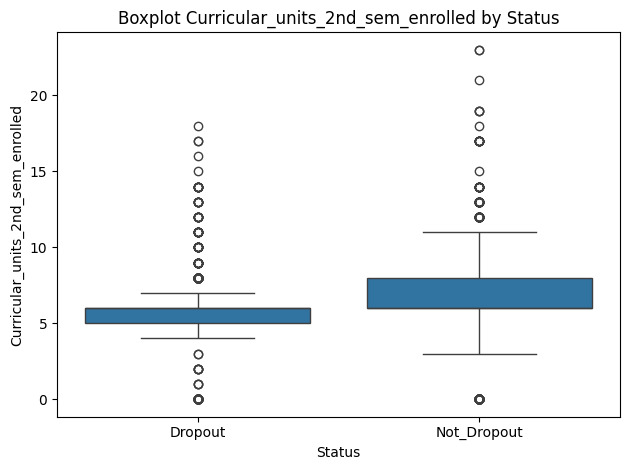

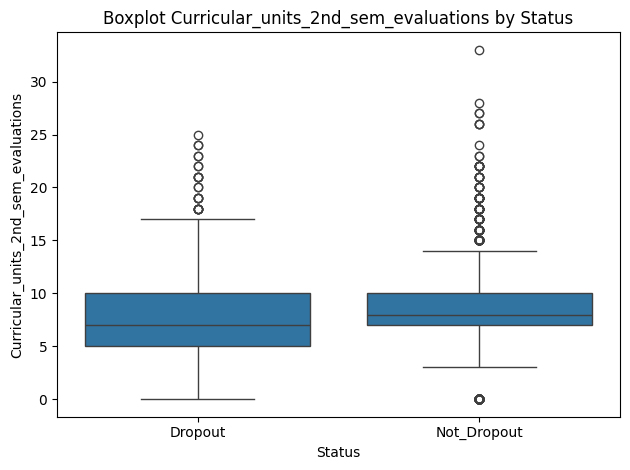

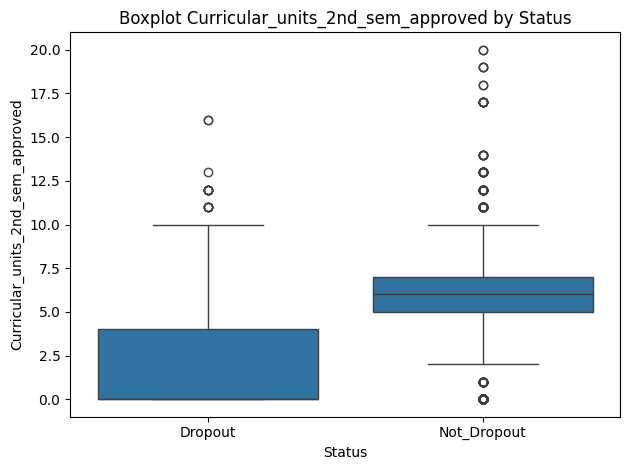

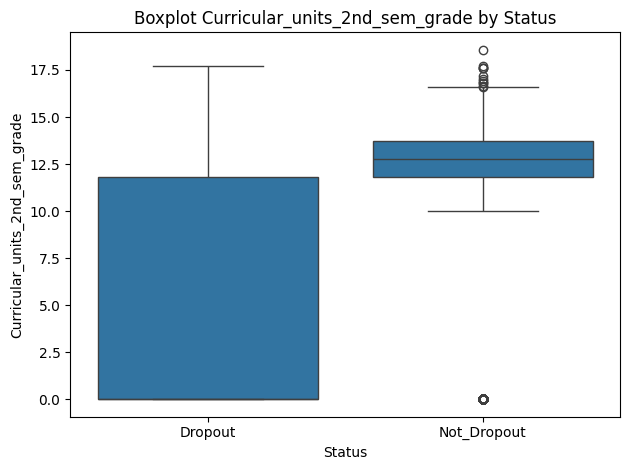

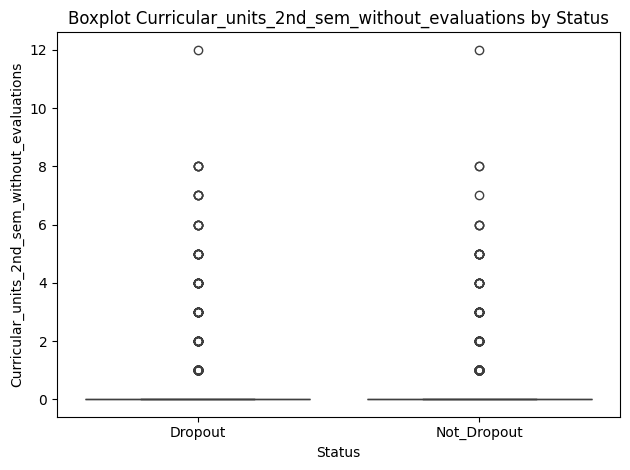

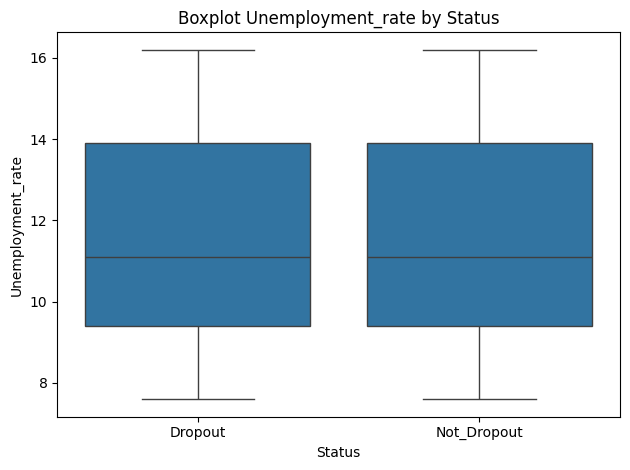

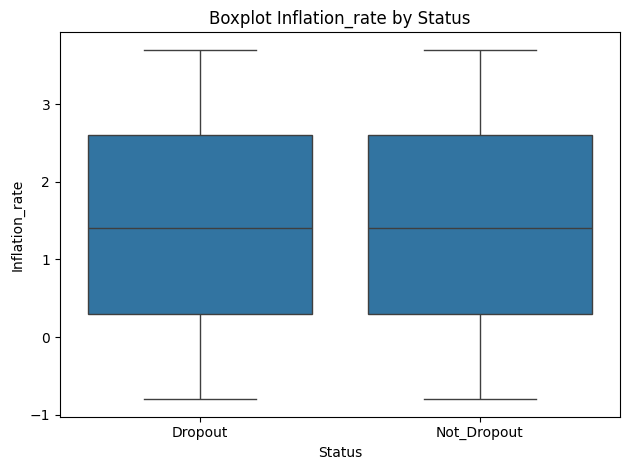

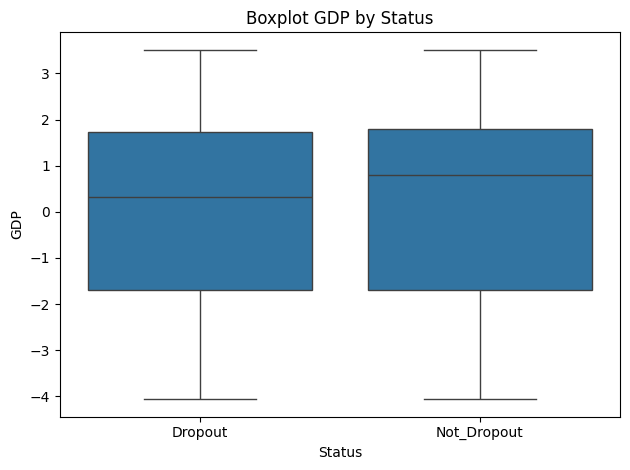

In [11]:
# numeric boxplots
num_cols = df_prep.select_dtypes(include=['int64','float64'])
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Status', y=col, data=df_prep)
    plt.title(f'Boxplot {col} by Status')
    plt.tight_layout()

<Figure size 1500x600 with 0 Axes>

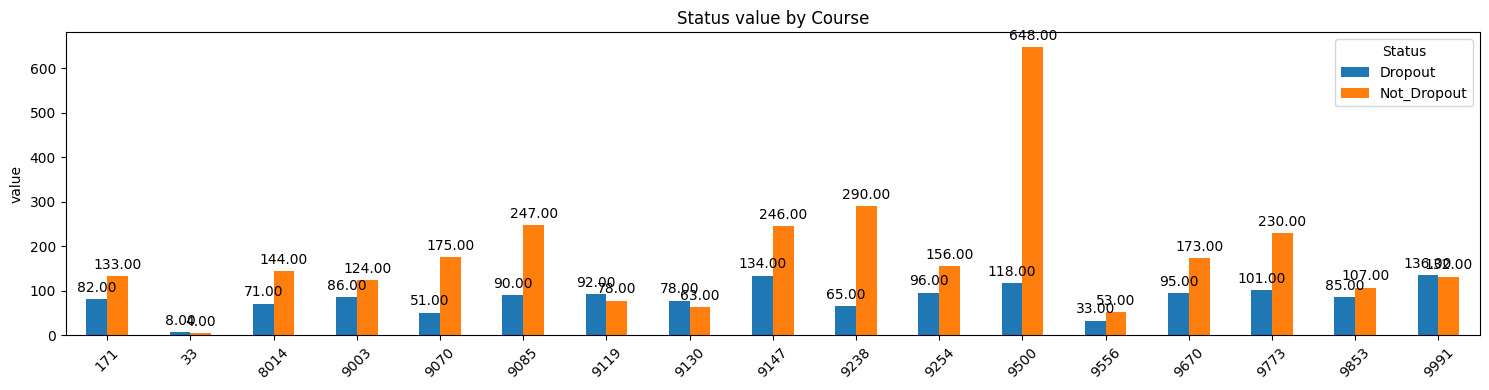

<Figure size 1500x600 with 0 Axes>

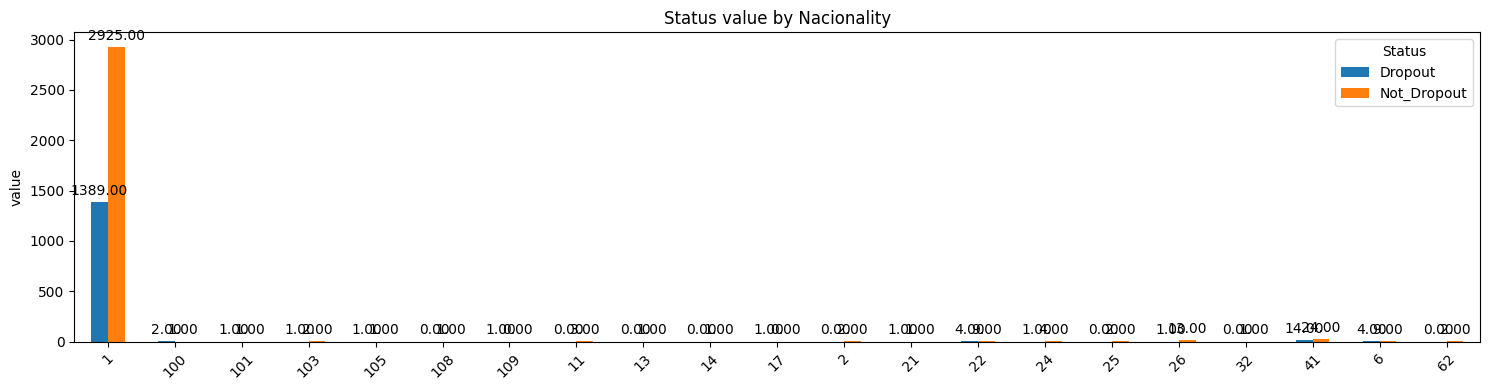

<Figure size 1500x600 with 0 Axes>

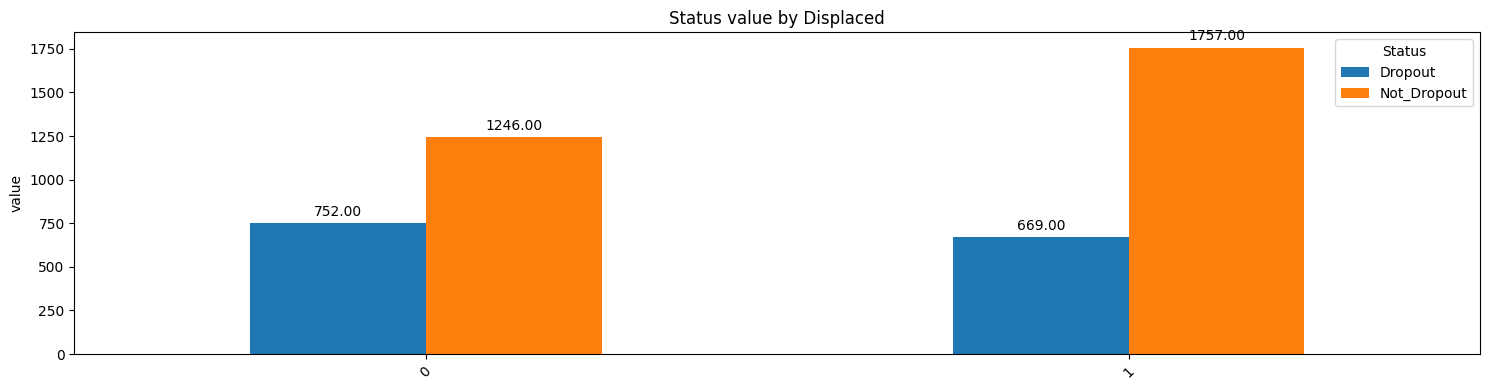

<Figure size 1500x600 with 0 Axes>

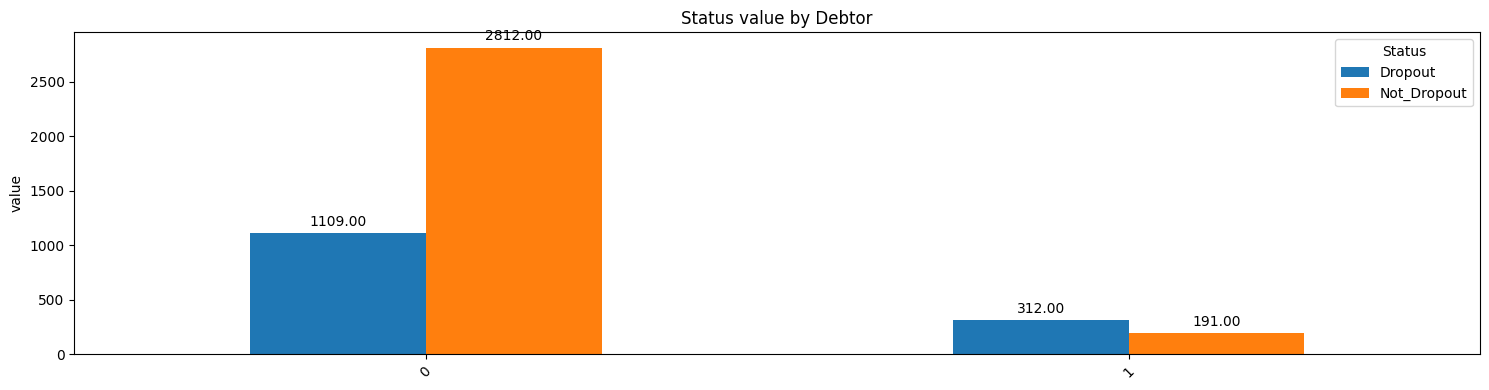

<Figure size 1500x600 with 0 Axes>

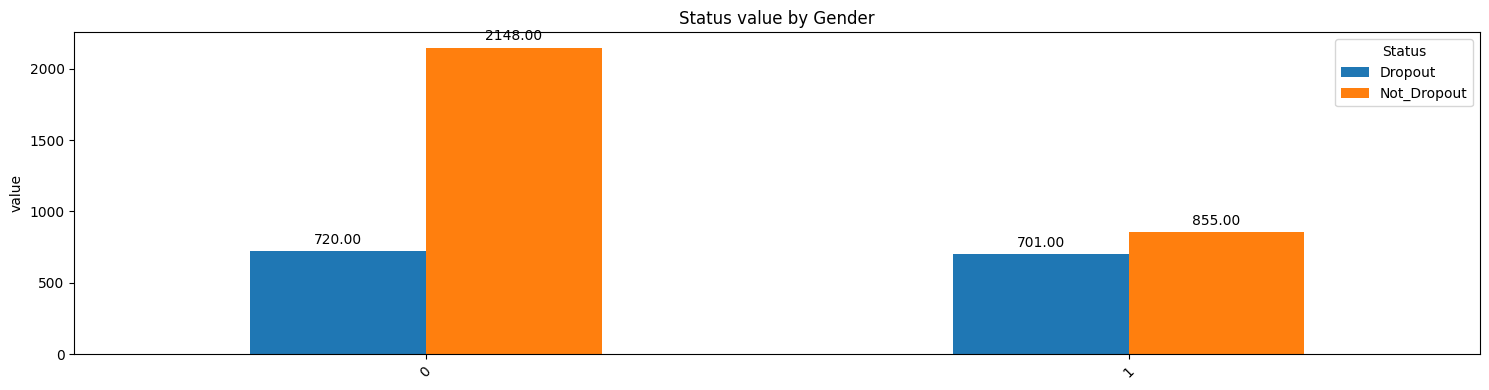

<Figure size 1500x600 with 0 Axes>

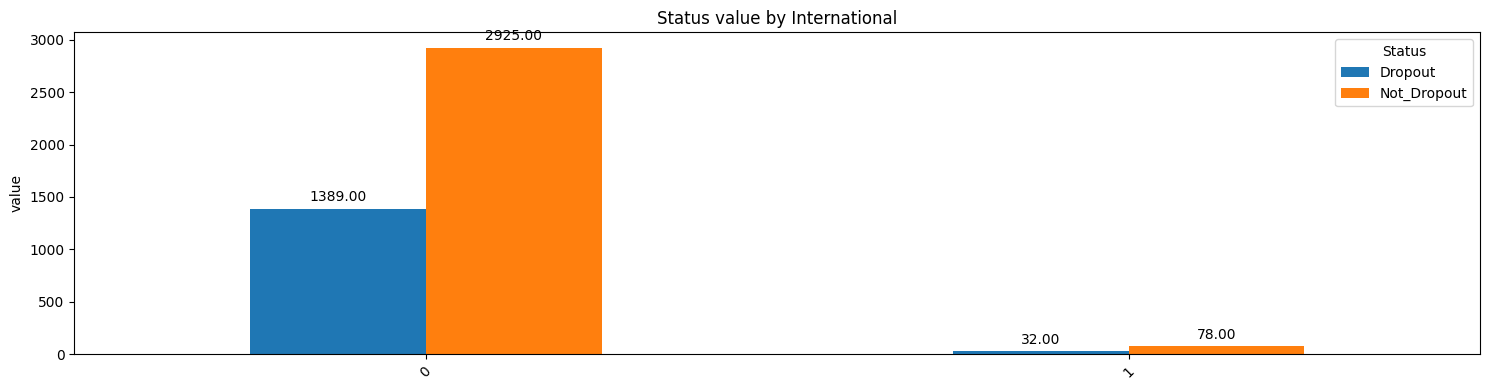

In [12]:
cat_cols = df_prep.select_dtypes(include=['object', 'category']).columns.drop('Status')
for col in cat_cols:
    plt.figure(figsize=(15, 6))

    # Calculate normalized proportion
    prop_df = df_prep.groupby(col)['Status'].value_counts().rename('value').reset_index()

    # Pivot to get grouped bar format (rows = category, columns = Status class)
    pivot_df = prop_df.pivot(index=col, columns='Status', values='value').fillna(0)

    # Plot grouped bar chart
    ax = pivot_df.plot(kind='bar', figsize=(15, 4), title=f'Status value by {col}')

    # Add value labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

    plt.xlabel('')
    plt.ylabel('value')
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

#### 1.   Bagaimanakah proporsi dropout dan tidak droput dari kelompok mahasiswa berdasarkan sebera lancar dalam membayar uang kuliah?

In [13]:
df_prep['Tuition_fees_up_to_date'].unique()

array([1, 0])

In [14]:
df_prep['Status'].unique()

array(['Dropout', 'Not_Dropout'], dtype=object)

In [15]:
df_prep['Tuition_fees_up_to_date'] = df_prep['Tuition_fees_up_to_date'].map({
    0: 'Fees NOT up to date',
    1: 'Fees up to date'
})
df_prep['Tuition_fees_up_to_date'].unique()

array(['Fees up to date', 'Fees NOT up to date'], dtype=object)

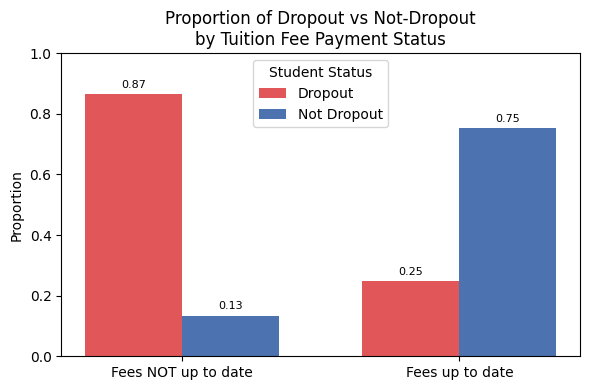

In [16]:
# Create a crosstab with proportions
tuition_ct = pd.crosstab(df_prep['Tuition_fees_up_to_date'], df_prep['Status'], normalize='index')

# Extract data
labels = tuition_ct.index.tolist()
dropout = tuition_ct['Dropout'].values
not_dropout = tuition_ct['Not_Dropout'].values

x = range(len(labels))
width = 0.35  # width of each bar

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))

# Bars for Dropout and Not_Dropout
bars1 = ax.bar([i - width/2 for i in x], dropout, width, label='Dropout', color='#E15759')
bars2 = ax.bar([i + width/2 for i in x], not_dropout, width, label='Not Dropout', color='#4C72B0')

# Labels and title
ax.set_ylabel("Proportion")
ax.set_title("Proportion of Dropout vs Not-Dropout\nby Tuition Fee Payment Status")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend(title='Student Status')

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Q** : Bagaimanakah proporsi dropout dan tidak droput dari kelompok mahasiswa berdasarkan sebera lancar dalam membayar uang kuliah?


**A** : Seperti yang bisa dilihat pada grouped bar chart pada kelompok mahasiswa yang pembayaran uang kuliahnya tidak lancar (menunggak) rasio mahasiswa yang dropout dibanging tidak drop out nya sangatlah tinggi, yang berada di angka 87%, yang mana kelompok mahasiswa yang pembayarannya lancar hanya 25%. Dikarenakan perbedaan rasio yang sangat signifikan ini diharapkan agar pihak Edutech dapat memberikan perhatian dan perlakuan khusus untuk mengatasi permasalahan dropout ini

In [17]:
df_prep.loc[df_prep['Tuition_fees_up_to_date'] == 'Fees up to date', 'Status'].value_counts()

,count
Status,
Not_Dropout,2932
Dropout,964


#### 2. Bagaimanakah hubungan performa di semester satu (number of courses approved) mempengaruhi apakah mahasiswa akan dropout atau tidak?

In [18]:
df_prep['Status'].unique()

array(['Dropout', 'Not_Dropout'], dtype=object)

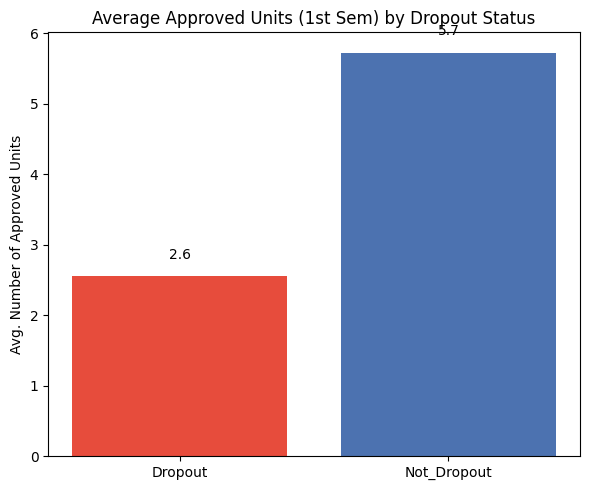

In [19]:
# Compute mean values
mean_approved_units = df_prep.groupby('Status')['Curricular_units_1st_sem_approved'].mean()

# Labels for x-axis
labels = mean_approved_units.index.tolist()
colors = ['#E74C3C', '#4C72B0']

# Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, mean_approved_units, color=colors)

# Add value labels on top of bars
for i, val in enumerate(mean_approved_units):
    plt.text(i, val + 0.2, f'{val:.1f}', ha='center', va='bottom', fontsize=10)

plt.title("Average Approved Units (1st Sem) by Dropout Status")
plt.ylabel("Avg. Number of Approved Units")
plt.tight_layout()

**Q** : Bagaimanakah hubungan performa di semester satu (number of courses approved) mempengaruhi apakah mahasiswa akan dropout atau tidak?

**A** : Bar chart di atas menampilkan perbandingan rata rata jumlah courses yang berhasil diselesaikan oleh mahasiswa dari kelompok dropout dan non dropout. Rata rata jumlah courses yang berhasil diselesaikan oleh mahasiswa yang dropout bahkan hanya mencapai setengah dari raihan kelompok mahasiswa not dropout. Rata rata jumlah dari course yang berhasil diselesakan dari kelompok dropout dan not dropout masing masing adalah 2,6 dan 5,7. Oleh karena it, apabila ada mahasiswa yang hanya mampu menyelesaikan course kurang dari 3 course maka perlu diberikan perhatian khusus

In [20]:
df_prep['Curricular_units_1st_sem_approved'].mean()

np.float64(4.706600361663653)

#### 3. Bagaimanakah kelompok usia mempengaruhi kemungkinan drop out?

<ipython-input-21-788fe14b7979>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_ct = df_prep.groupby('AgeGroup')['Is_Dropout'].mean().reset_index()


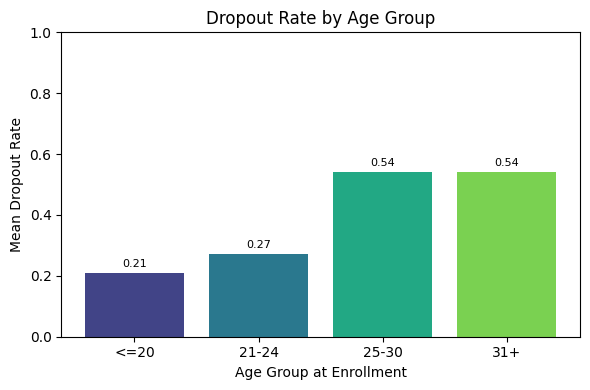

In [21]:
# Create age bins and labels
bins = [0, 20, 24, 30, 100]
labels = ['<=20', '21-24', '25-30', '31+']
df_prep['AgeGroup'] = pd.cut(df_prep['Age_at_enrollment'], bins=bins, labels=labels, right=False)

# Create dropout indicator
df_prep['Is_Dropout'] = df_prep['Status'].map({'Dropout': 1, 'Not_Dropout': 0})

# Compute dropout rate by age group
age_ct = df_prep.groupby('AgeGroup')['Is_Dropout'].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(age_ct['AgeGroup'], age_ct['Is_Dropout'], color=plt.cm.viridis([0.2, 0.4, 0.6, 0.8]))

# Labels and formatting
ax.set_title("Dropout Rate by Age Group")
ax.set_xlabel("Age Group at Enrollment")
ax.set_ylabel("Mean Dropout Rate")
ax.set_ylim(0, 1)

# Add bar labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

**Q** : Bagaimanakah kelompok usia mempengaruhi kemungkinan drop out

**A** : Bar chart di atas menampilkan perbedaan rasio mahasiswa drop out vs not drop out di masing masing kelompok usia, yang mana kelompok usia yang lebih tua yaitu kelompok usia 25 - 30 dan 31+ memiliki rasio yang 2 kali lebih besar dari 2 kelompok usia dengan rasio terendah. Kedua kelompok usia dengan rasio tertinggi tersebut yakni kelompok usia 25 - 30 dan 31+ memiliki rasio dropout diatas 50% dengan kata lain setengah dari mahasiswa dari 2 kelompok usia tersebut terkena dropout!. Hal ini tentunya harus menjadi perhatian series bagi perusahaan Edutech untuk mencegah kelompok usia 25+ agar tidak dropout

#### 4. Bagaimanakah dampak dari penerimaan beasiswa terhadap kemungkinan drop out?

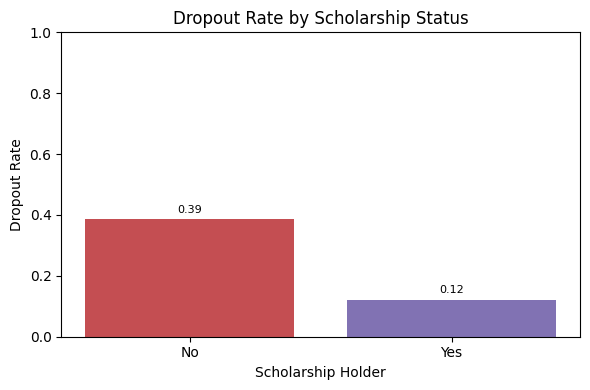

In [22]:
# Create dropout rate by scholarship status
scholar_ct = df_prep.groupby('Scholarship_holder')['Is_Dropout'].mean().reset_index()

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Define x-tick labels
x_labels = ['No', 'Yes']  # Corresponding to 0 and 1
x = [0, 1]
bars = ax.bar(x, scholar_ct['Is_Dropout'], color=['#C44E52', '#8172B3'])

# Add labels and formatting
ax.set_title("Dropout Rate by Scholarship Status")
ax.set_xlabel("Scholarship Holder")
ax.set_ylabel("Dropout Rate")
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

**Q** : Bagaimanakah dampak dari penerimaan beasiswa terhadap kemungkinan drop out

**A** : Kelompok yang bukan penerima beasiswa memiliki rasio dropout lebih tinggi, yaitu di angka 39%. Sedangkan, kelompok penerima beasiswa hanya di angka 12%. Hal ini menunjukan, kelompok penerima beasiswa memiliki komitmen tinggi dalam menyelasiakan studinya relatif terhadap kelompon non penerima beasiswa

In [23]:
df_prep.to_csv('students_performance_cleaned.csv', index=False)
print('saved to csv!')

saved to csv!


In [24]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   int64   
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   object  
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   object  
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

#### EDA conclusions

### 1. Bagaimanakah proporsi dropout dan tidak droput dari kelompok mahasiswa berdasarkan sebera lancar dalam membayar uang kuliah?
Seperti yang bisa dilihat pada grouped bar chart pada kelompok mahasiswa yang pembayaran uang kuliahnya tidak lancar (menunggak) rasio mahasiswa yang dropout dibanging tidak drop out nya sangatlah tinggi, yang berada di angka 87%, yang mana kelompok mahasiswa yang pembayarannya lancar hanya 25%. Dikarenakan perbedaan rasio yang sangat signifikan ini diharapkan agar pihak Edutech dapat memberikan perhatian dan perlakuan khusus untuk mengatasi permasalahan dropout ini

Rekomendasi :

*   Buat sistem peringatan dini ataupun pemberitahuan (early warning system) untuk mahasiswa yang mulai menunggak.
*   Pertimbangkan skema cicilan atau penjadwalan ulang pembayaran bagi mahasiswa yang mengalami kesulitan finansial.
*   Sediakan layanan konsultasi keuangan untuk mahasiswa baru dan yang sedang kesulitan.



### 2. Bagaimanakah hubungan performa di semester satu (number of courses approved) mempengaruhi apakah mahasiswa akan dropout atau tidak?

Bar chart di atas menampilkan perbandingan rata rata jumlah courses yang berhasil diselesaikan oleh mahasiswa dari kelompok dropout dan non dropout. Rata rata jumlah courses yang berhasil diselesaikan oleh mahasiswa yang dropout bahkan hanya mencapai setengah dari raihan kelompok mahasiswa not dropout. Rata rata jumlah dari course yang berhasil diselesakan dari kelompok dropout dan not dropout masing masing adalah 2,6 dan 5,7. Oleh karena it, apabila ada mahasiswa yang hanya mampu menyelesaikan course kurang dari 3 course maka perlu diberikan perhatian khusus

Rekomendasi :

*   Identifikasi mahasiswa dengan performa semester pertama rendah (misalnya kurang dari 3 courses lulus) untuk mendapat pendampingan akademik.

*   Terapkan program mentoring atau remedial bagi mahasiswa yang menunjukkan performa rendah di awal studi

### 3. Bagaimanakah kelompok usia mempengaruhi kemungkinan drop out

Bar chart di atas menampilkan perbedaan rasio mahasiswa drop out vs not drop out di masing masing kelompok usia, yang mana kelompok usia yang lebih tua yaitu kelompok usia 25 - 30 dan 31+ memiliki rasio yang 2 kali lebih besar dari 2 kelompok usia dengan rasio terendah. Kedua kelompok usia dengan rasio tertinggi tersebut yakni kelompok usia 25 - 30 dan 31+ memiliki rasio dropout diatas 50% dengan kata lain setengah dari mahasiswa dari 2 kelompok usia tersebut terkena dropout!. Hal ini tentunya harus menjadi perhatian series bagi perusahaan Edutech untuk mencegah kelompok usia 25+ agar tidak dropout

Rekomendasi :

*   Buat program khusus untuk mahasiswa usia 25+, seperti kelas malam, pembelajaran fleksibel, atau dukungan karir.

*   Selenggarakan workshop atau pelatihan manajemen waktu dan studi mandiri untuk mahasiswa yang bekerja sambil kuliah.

### 4. Bagaimanakah dampak dari penerimaan beasiswa terhadap kemungkinan drop out

Kelompok yang bukan penerima beasiswa memiliki rasio dropout lebih tinggi, yaitu di angka 39%. Sedangkan, kelompok penerima beasiswa hanya di angka 12%. Hal ini menunjukan, kelompok penerima beasiswa memiliki komitmen tinggi dalam menyelasiakan studinya relatif terhadap kelompon non penerima beasiswa

Rekomendasi :

*   Pertimbangkan perluasan program beasiswa, terutama bagi mahasiswa dari latar belakang rentan.

*   Tawarkan insentif atau program bantuan keuangan berbasis performa untuk mahasiswa berprestasi bagi kelompok non penerima beasiswa.

### Conclusions

Berdasarkan analisis data, ditemukan bahwa faktor-faktor seperti

*   keterlambatan pembayaran uang kuliah, performa rendah di semester awal,
*   usia yang lebih tua saat masuk,
*   dan ketidakadaan beasiswa

secara signifikan berkaitan dengan meningkatnya risiko dan kemungkinan dropout mahasiswa


## Data Preparation / Preprocessing

In [25]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   int64   
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   object  
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   object  
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

In [26]:
irrelevant_cols = ['Status','Age_at_enrollment']
df_prep.drop(irrelevant_cols, axis=1, inplace=True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   int64   
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   object  
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   object  
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

In [27]:
marital_status_mapping = {
    "1": "Single", "2": "Married", "3": "Widower", "4": "Divorced", "5": "Facto Union", "6": "Legally Separated"
}

app_mode_mapping = {
    "1": "1st phase - general contingent",
    "2": "Ordinance No. 612/93",
    "5": "1st phase - special contingent (Azores Island)",
    "7": "Holders of other higher courses",
    "10": "Ordinance No. 854-B/99",
    "15": "International student (bachelor)",
    "16": "1st phase - special contingent (Madeira Island)",
    "17": "2nd phase - general contingent",
    "18": "3rd phase - general contingent",
    "26": "Ordinance No. 533-A/99, item b2 (Different Plan)",
    "27": "Ordinance No. 533-A/99, item b3 (Other Institution)",
    "39": "Over 23 years old",
    "42": "Transfer",
    "43": "Change of course",
    "44": "Technological specialization diploma holders",
    "51": "Change of institution/course",
    "53": "Short cycle diploma holders",
    "57": "Change of institution/course (International)"
}

course_mapping = {
    "33": "Biofuel Production Technologies",
    "171": "Animation and Multimedia Design",
    "8014": "Social Service (evening attendance)",
    "9003": "Agronomy",
    "9070": "Communication Design",
    "9085": "Veterinary Nursing",
    "9119": "Informatics Engineering",
    "9130": "Equinculture",
    "9147": "Management",
    "9238": "Social Service",
    "9254": "Tourism",
    "9500": "Nursing",
    "9556": "Oral Hygiene",
    "9670": "Advertising and Marketing Management",
    "9773": "Journalism and Communication",
    "9853": "Basic Education",
    "9991": "Management (evening attendance)"
}

prev_qual_mapping = {
    "1": "Secondary education",
    "2": "Higher education - bachelor's degree",
    "3": "Higher education - degree",
    "4": "Higher education - master's",
    "5": "Higher education - doctorate",
    "6": "Frequency of higher education",
    "9": "12th year of schooling - not completed",
    "10": "11th year of schooling - not completed",
    "12": "Other - 11th year of schooling",
    "14": "10th year of schooling",
    "15": "10th year of schooling - not completed",
    "19": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    "38": "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    "39": "Technological specialization course",
    "40": "Higher education - degree (1st cycle)",
    "42": "Professional higher technical course",
    "43": "Higher education - master (2nd cycle)"
}

nationality_mapping = {
    "1": "Portuguese", "2": "German", "6": "Spanish", "11": "Italian", "13": "Dutch", "14": "English",
    "17": "Lithuanian", "21": "Angolan", "22": "Cape Verdean", "24": "Guinean", "25": "Mozambican",
    "26": "Santomean", "32": "Turkish", "41": "Brazilian", "62": "Romanian", "100": "Moldova (Republic of)",
    "101": "Mexican", "103": "Ukrainian", "105": "Russian", "108": "Cuban", "109": "Colombian"
}

qualification_mapping = {
    "1": "Secondary Education - 12th Year of Schooling or Eq.",
    "2": "Higher Education - Bachelor's Degree",
    "3": "Higher Education - Degree",
    "4": "Higher Education - Master's",
    "5": "Higher Education - Doctorate",
    "6": "Frequency of Higher Education",
    "9": "12th Year of Schooling - Not Completed",
    "10": "11th Year of Schooling - Not Completed",
    "11": "7th Year (Old)",
    "12": "Other - 11th Year of Schooling",
    "13": "2nd year complementary high school course",
    "14": "10th Year of Schooling",
    "18": "General commerce course",
    "19": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "20": "Complementary High School Course",
    "22": "Technical-professional course",
    "25": "Complementary High School Course - not concluded",
    "26": "7th year of schooling",
    "27": "2nd cycle of the general high school course",
    "29": "9th Year of Schooling - Not Completed",
    "30": "8th year of schooling",
    "31": "General Course of Administration and Commerce",
    "33": "Supplementary Accounting and Administration",
    "34": "Unknown",
    "35": "Can't read or write",
    "36": "Can read without having a 4th year of schooling",
    "37": "Basic education 1st cycle (4th/5th year) or equiv.",
    "38": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    "39": "Technological specialization course",
    "40": "Higher education - degree (1st cycle)",
    "41": "Specialized higher studies course",
    "42": "Professional higher technical course",
    "43": "Higher Education - Master (2nd cycle)",
    "44": "Higher Education - Doctorate (3rd cycle)"
}

mothers_occupation_mapping = {
    "0": "Student",
    "1": "Legislative/Executive/Director/Manager",
    "2": "Intellectual & Scientific Activities",
    "3": "Intermediate Technicians & Professions",
    "4": "Administrative Staff",
    "5": "Personal Services/Security/Sellers",
    "6": "Farmers/Skilled Agriculture",
    "7": "Skilled Industry/Construction/Crafts",
    "8": "Machine Operators/Assembly Workers",
    "9": "Unskilled Workers",
    "10": "Armed Forces",
    "90": "Other Situation",
    "99": "(Blank)",
    "122": "Health Professionals",
    "123": "Teachers",
    "125": "ICT Specialists",
    "131": "Science/Engineering Techs",
    "132": "Intermediate Health Technicians",
    "134": "Legal/Social/Sports/Cultural Techs",
    "141": "Office Workers/Data Operators",
    "143": "Accounting/Financial Operators",
    "144": "Other Admin Support Staff",
    "151": "Personal Service Workers",
    "152": "Sellers",
    "153": "Personal Care Workers",
    "171": "Skilled Construction (not electricians)",
    "173": "Printing/Precision/Jewelry/Artisans",
    "175": "Food/Wood/Clothing Industries",
    "191": "Cleaning Workers",
    "192": "Unskilled Agriculture Workers",
    "193": "Unskilled Construction/Manufacturing",
    "194": "Meal Prep Assistants"
}

fathers_occupation_mapping = {
    "0": "Student",
    "1": "Legislative/Executive/Director/Manager",
    "2": "Intellectual & Scientific Activities",
    "3": "Intermediate Technicians & Professions",
    "4": "Administrative Staff",
    "5": "Personal Services/Security/Sellers",
    "6": "Farmers/Skilled Agriculture",
    "7": "Skilled Industry/Construction/Crafts",
    "8": "Machine Operators/Assembly Workers",
    "9": "Unskilled Workers",
    "10": "Armed Forces",
    "90": "Other Situation",
    "99": "(Blank)",
    "101": "Armed Forces Officers",
    "102": "Armed Forces Sergeants",
    "103": "Other Armed Forces Personnel",
    "112": "Admin/Commercial Service Directors",
    "114": "Hotel/Catering/Trade Directors",
    "121": "Physical Sciences/Engineering Specialists",
    "122": "Health Professionals",
    "123": "Teachers",
    "124": "Finance/Admin/Public Relations",
    "131": "Science/Engineering Technicians",
    "132": "Intermediate Health Technicians",
    "134": "Legal/Social/Sports/Cultural Techs",
    "135": "ICT Technicians",
    "141": "Office Workers/Data Operators",
    "143": "Accounting/Financial Operators",
    "144": "Other Admin Support Staff",
    "151": "Personal Service Workers",
    "152": "Sellers",
    "153": "Personal Care Workers",
    "154": "Security Services",
    "161": "Skilled Agricultural Workers",
    "163": "Subsistence Farmers/Fishers",
    "171": "Skilled Construction (not electricians)",
    "172": "Metalworking Workers",
    "174": "Electrical Workers",
    "175": "Food/Wood/Clothing Industries",
    "181": "Plant/Machine Operators",
    "182": "Assembly Workers",
    "183": "Vehicle/Mobile Equipment Operators",
    "192": "Unskilled Agriculture Workers",
    "193": "Unskilled Construction/Manufacturing",
    "194": "Meal Prep Assistants",
    "195": "Street Vendors/Service Providers"
}

daytime_evening_attendance_mapping = {
    "1": "Daytime",
    "0": "Evening"
}

displaced_mapping = {
    "1": "Yes",
    "0": "No"
}
educational_special_needs_mapping = {
    "1": "Yes",
    "0": "No"
}
debtor_mapping = {
    "1": "Yes",
    "0": "No"
}
gender_mapping = {
    "1": "Male",
    "0": "Female"
}
scolarship_holder_mapping = {
    "1": "Yes",
    "0": "No"
}
international_mapping = {
    "1": "Yes",
    "0": "No"
}

In [28]:
# List of columns you want to convert to category dtype
to_be_converted = [
    'Marital_status', 'Application_mode', 'Course', 'Previous_qualification',
    'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Daytime_evening_attendance',
    'Displaced', 'Educational_special_needs', 'Debtor', 'Gender',
    'Scholarship_holder', 'International'
]

df_prep[to_be_converted].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital_status              4424 non-null   int64 
 1   Application_mode            4424 non-null   int64 
 2   Course                      4424 non-null   object
 3   Previous_qualification      4424 non-null   int64 
 4   Nacionality                 4424 non-null   object
 5   Mothers_qualification       4424 non-null   int64 
 6   Fathers_qualification       4424 non-null   int64 
 7   Mothers_occupation          4424 non-null   int64 
 8   Fathers_occupation          4424 non-null   int64 
 9   Daytime_evening_attendance  4424 non-null   int64 
 10  Displaced                   4424 non-null   object
 11  Educational_special_needs   4424 non-null   int64 
 12  Debtor                      4424 non-null   object
 13  Gender                      4424 non-null   obje

In [29]:
# Convert each to category dtype
for col in to_be_converted:
    if col in df_prep.columns:
        df_prep[col] = df_prep[col].astype('category')
    else:
        print(f"Column '{col}' not found in the DataFrame.")

df_prep[to_be_converted].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Marital_status              4424 non-null   category
 1   Application_mode            4424 non-null   category
 2   Course                      4424 non-null   category
 3   Previous_qualification      4424 non-null   category
 4   Nacionality                 4424 non-null   category
 5   Mothers_qualification       4424 non-null   category
 6   Fathers_qualification       4424 non-null   category
 7   Mothers_occupation          4424 non-null   category
 8   Fathers_occupation          4424 non-null   category
 9   Daytime_evening_attendance  4424 non-null   category
 10  Displaced                   4424 non-null   category
 11  Educational_special_needs   4424 non-null   category
 12  Debtor                      4424 non-null   category
 13  Gender            

In [30]:
df_prep[to_be_converted].head(5)

,Marital_status,Application_mode,Course,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Displaced,Educational_special_needs,Debtor,Gender,Scholarship_holder,International
0,1,17,171,1,1,19,12,5,9,1,1,0,0,1,0,0
1,1,15,9254,1,1,1,3,3,3,1,1,0,0,1,0,0
2,1,1,9070,1,1,37,37,9,9,1,1,0,0,1,0,0
3,1,17,9773,1,1,38,37,5,3,1,1,0,0,0,0,0
4,2,39,8014,1,1,37,38,9,9,0,0,0,0,0,0,0


In [31]:
df_prep['Marital_status'] = df_prep['Marital_status'].astype(str).map(marital_status_mapping)
df_prep['Application_mode'] = df_prep['Application_mode'].astype(str).map(app_mode_mapping)
df_prep['Course'] = df_prep['Course'].astype(str).map(course_mapping)
df_prep['Previous_qualification'] = df_prep['Previous_qualification'].astype(str).map(prev_qual_mapping)
df_prep['Nacionality'] = df_prep['Nacionality'].astype(str).map(nationality_mapping)
df_prep['Mothers_qualification'] = df_prep['Mothers_qualification'].astype(str).map(qualification_mapping)
df_prep['Fathers_qualification'] = df_prep['Fathers_qualification'].astype(str).map(qualification_mapping)
df_prep['Mothers_occupation'] = df_prep['Mothers_occupation'].astype(str).map(mothers_occupation_mapping)
df_prep['Fathers_occupation'] = df_prep['Fathers_occupation'].astype(str).map(fathers_occupation_mapping)
df_prep['Daytime_evening_attendance'] = df_prep['Daytime_evening_attendance'].astype(str).map(daytime_evening_attendance_mapping)
df_prep['Displaced'] = df_prep['Displaced'].astype(str).map(displaced_mapping)
df_prep['Educational_special_needs'] = df_prep['Educational_special_needs'].astype(str).map(educational_special_needs_mapping)
df_prep['Debtor'] = df_prep['Debtor'].astype(str).map(debtor_mapping)
df_prep['Gender'] = df_prep['Gender'].astype(str).map(gender_mapping)
df_prep['Scholarship_holder'] = df_prep['Scholarship_holder'].astype(str).map(scolarship_holder_mapping)
df_prep['International'] = df_prep['International'].astype(str).map(international_mapping)

In [32]:
df_prep[to_be_converted].head(5)

,Marital_status,Application_mode,Course,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Displaced,Educational_special_needs,Debtor,Gender,Scholarship_holder,International
0,Single,2nd phase - general contingent,Animation and Multimedia Design,Secondary education,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,Other - 11th Year of Schooling,Personal Services/Security/Sellers,Unskilled Workers,Daytime,Yes,No,No,Male,No,No
1,Single,International student (bachelor),Tourism,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling or Eq.,Higher Education - Degree,Intermediate Technicians & Professions,Intermediate Technicians & Professions,Daytime,Yes,No,No,Male,No,No
2,Single,1st phase - general contingent,Communication Design,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or equiv.,Basic education 1st cycle (4th/5th year) or equiv.,Unskilled Workers,Unskilled Workers,Daytime,Yes,No,No,Male,No,No
3,Single,2nd phase - general contingent,Journalism and Communication,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,Basic education 1st cycle (4th/5th year) or equiv.,Personal Services/Security/Sellers,Intermediate Technicians & Professions,Daytime,Yes,No,No,Female,No,No
4,Married,Over 23 years old,Social Service (evening attendance),Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or equiv.,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,Unskilled Workers,Unskilled Workers,Evening,No,No,No,Female,No,No


In [33]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   object  
 1   Application_mode                              4424 non-null   object  
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   object  
 4   Daytime_evening_attendance                    4424 non-null   object  
 5   Previous_qualification                        4424 non-null   object  
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   object  
 8   Mothers_qualification                         4424 non-null   object  
 9   Fathers_qualification                         4424 n

In [34]:
cat_cols = df_prep.select_dtypes(include=['object','category']).columns

for i, col in enumerate(cat_cols):
    print(f'{i+1}. {col} nunique : {df_prep[col].nunique()}')


    # identifying cat cols with 10+ categories
    if df_prep[col].nunique() > 10:

        value_counts = df_prep[col].value_counts(normalize=True)
        print(f"\tvalue counts : \n{value_counts}")

        # merge category with low ocurrences (occurences of cat < 5%) into 'other' category
        rare_categories = value_counts[value_counts < 0.05].index
        df_prep[col] = df_prep[col].apply(lambda x: 'Other' if x in rare_categories else x)
        print(f"\tunique values after reducing cols : {df_prep[col].unique()}")
        print(f"\tnunique after reducing cols : {df_prep[col].nunique()}")
        print('-'*10)
        print()

1. Marital_status nunique : 6
2. Application_mode nunique : 18
	value counts : 
Application_mode
1st phase - general contingent                         0.386076
2nd phase - general contingent                         0.197107
Over 23 years old                                      0.177441
Change of course                                       0.070524
Technological specialization diploma holders           0.048146
Holders of other higher courses                        0.031420
3rd phase - general contingent                         0.028029
Transfer                                               0.017405
Change of institution/course                           0.013336
1st phase - special contingent (Madeira Island)        0.008590
Short cycle diploma holders                            0.007911
International student (bachelor)                       0.006781
1st phase - special contingent (Azores Island)         0.003617
Ordinance No. 854-B/99                                 0.002260
Ordinan

In [35]:
cat_cols = df_prep.select_dtypes(include=['object','category']).columns
print(f"cat_cols : {cat_cols}")

cat_cols : Index(['Marital_status', 'Application_mode', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Educational_special_needs',
       'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'International', 'AgeGroup'],
      dtype='object')


In [36]:
df_encoded = pd.get_dummies(df_prep[cat_cols])
print(f"df_encoded cols : {df_encoded.columns}")

df_encoded cols : Index(['Marital_status_Divorced', 'Marital_status_Facto Union',
       'Marital_status_Legally Separated', 'Marital_status_Married',
       'Marital_status_Single', 'Marital_status_Widower',
       'Application_mode_1st phase - general contingent',
       'Application_mode_2nd phase - general contingent',
       'Application_mode_Change of course', 'Application_mode_Other',
       'Application_mode_Over 23 years old',
       'Course_Advertising and Marketing Management',
       'Course_Communication Design', 'Course_Journalism and Communication',
       'Course_Management', 'Course_Management (evening attendance)',
       'Course_Nursing', 'Course_Other', 'Course_Social Service',
       'Course_Tourism', 'Course_Veterinary Nursing',
       'Daytime_evening_attendance_Daytime',
       'Daytime_evening_attendance_Evening', 'Previous_qualification_Other',
       'Previous_qualification_Secondary education', 'Nacionality_Other',
       'Nacionality_Portuguese',
       'Mo

In [37]:
# Then join it back with the numeric features
df_final = pd.concat([df_prep.drop(columns=cat_cols), df_encoded], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 92 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Application_order                                                               4424 non-null   int64  
 1   Previous_qualification_grade                                                    4424 non-null   float64
 2   Admission_grade                                                                 4424 non-null   float64
 3   Curricular_units_1st_sem_credited                                               4424 non-null   int64  
 4   Curricular_units_1st_sem_enrolled                                               4424 non-null   int64  
 5   Curricular_units_1st_sem_evaluations                                            4424 non-null   int64  
 6   Curricular_units

In [38]:
df_final.sample(5)

,Application_order,Previous_qualification_grade,Admission_grade,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Is_Dropout,Marital_status_Divorced,Marital_status_Facto Union,Marital_status_Legally Separated,Marital_status_Married,Marital_status_Single,Marital_status_Widower,Application_mode_1st phase - general contingent,Application_mode_2nd phase - general contingent,Application_mode_Change of course,Application_mode_Other,Application_mode_Over 23 years old,Course_Advertising and Marketing Management,Course_Communication Design,Course_Journalism and Communication,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Other,Course_Social Service,Course_Tourism,Course_Veterinary Nursing,Daytime_evening_attendance_Daytime,Daytime_evening_attendance_Evening,Previous_qualification_Other,Previous_qualification_Secondary education,Nacionality_Other,Nacionality_Portuguese,Mothers_qualification_Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,Mothers_qualification_Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,Mothers_qualification_Basic education 1st cycle (4th/5th year) or equiv.,Mothers_qualification_Higher Education - Degree,Mothers_qualification_Other,Mothers_qualification_Secondary Education - 12th Year of Schooling or Eq.,Fathers_qualification_Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,Fathers_qualification_Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,Fathers_qualification_Basic education 1st cycle (4th/5th year) or equiv.,Fathers_qualification_Higher Education - Degree,Fathers_qualification_Other,Fathers_qualification_Secondary Education - 12th Year of Schooling or Eq.,Mothers_occupation_Administrative Staff,Mothers_occupation_Intellectual & Scientific Activities,Mothers_occupation_Intermediate Technicians & Professions,Mothers_occupation_Other,Mothers_occupation_Personal Services/Security/Sellers,Mothers_occupation_Skilled Industry/Construction/Crafts,Mothers_occupation_Unskilled Workers,Fathers_occupation_Administrative Staff,Fathers_occupation_Armed Forces,Fathers_occupation_Farmers/Skilled Agriculture,Fathers_occupation_Intermediate Technicians & Professions,Fathers_occupation_Machine Operators/Assembly Workers,Fathers_occupation_Other,Fathers_occupation_Personal Services/Security/Sellers,Fathers_occupation_Skilled Industry/Construction/Crafts,Fathers_occupation_Unskilled Workers,Displaced_No,Displaced_Yes,Educational_special_needs_No,Educational_special_needs_Yes,Debtor_No,Debtor_Yes,Tuition_fees_up_to_date_Fees NOT up to date,Tuition_fees_up_to_date_Fees up to date,Gender_Female,Gender_Male,Scholarship_holder_No,Scholarship_holder_Yes,International_No,International_Yes,AgeGroup_<=20,AgeGroup_21-24,AgeGroup_25-30,AgeGroup_31+
1197,1,120.0,113.9,0,6,8,4,12.250000,0,0,6,13,3,10.333333,0,12.7,3.7,-1.70,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,True,False,True,False,True,False,False,True,False,False
1723,1,132.0,126.4,0,6,9,6,11.166667,0,0,6,11,5,12.400000,0,10.8,1.4,1.74,0,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Tru

Fitur numerik tidak discaling karena kita akan menggunakan random forest yang robust terhadap skala yg digunakan. Dan juga robust terhadap multicollinearity dan high dimensionality

## Modeling

In [39]:
df_final['Is_Dropout'].unique()

array([1, 0])

In [40]:
df_final['Is_Dropout'].value_counts()

,count
Is_Dropout,
0,3003
1,1421


In [41]:
# Define features (X) and target (y)
X = df_final.drop(columns=['Is_Dropout'])  # drop label from features
y = df_final['Is_Dropout']

print(X.columns)

Index(['Application_order', 'Previous_qualification_grade', 'Admission_grade',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Marital_status_Divorced',
       'Marital_status_Facto Union', 'Marital_status_Legally Separated',
       'Marital_status_Married', 'Marital_status_Single',
       'Marital_status_Widower',
       'Application_mode_1st phase - general contingent',
       'Application_mode_2nd phase - general contingent',
       'Application_mode_

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (3539, 91)
X_test shape : (885, 91)
y_train shape : (3539,)
y_test shape : (885,)


In [43]:
model_columns = X_train.columns.tolist()
joblib.dump(model_columns, "model_columns.pkl")

['model_columns.pkl']

In [44]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [45]:
# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       569
           1       0.89      0.71      0.79       316

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.84       885
weighted avg       0.87      0.86      0.86       885

Confusion Matrix:
 [[541  28]
 [ 92 224]]


In [46]:
# save model
joblib.dump(model, 'dropout_retention_model.pkl')

['dropout_retention_model.pkl']

### Model Summary



*   Secara umum performa model sudah cukup baik
*   Model cukup baik dalam memprediksi siswa yang tidak drop out, tetapi kurang sensitif terhadapa siswa yang akan drop out(recall for class 1 = 0.66).

